<img src=".sales_analysis.ipynb.upload/FullLogo_200x160.png" style="max-width:100%" />

## **Data Analysis with Python**



## **Capstone Project**

#### **Business Context**

With growing demands and cut\-throat competitions in the market, a Superstore Giant would like to design a customer loyalty program that strengthens its relationship with its' customers and incentivizes repeat purchases. The objective of the loyalty program is to increase customer retention and drive incremental sales by targeting customers with personalized promotional offers. The company's marketing manager has proposed to implement a tier\-based marketing campaign where customers are offered cash rewards as incentives towards their first purchase following enrollment into the loyalty program. The proposed cash reward offers are as follows:

1. Get \$200 on first purchase
2. Get \$100 on first purchase
3. Get \$25 on first purchase

The Superstore Giant is seeking your knowledge in identifying which customers should get what offer as this requires understanding the customers' buying behaviors. In addition, they would like to understand which products, regions, categories and customer segments they should target or avoid.

You have been provided access to the customer transaction database contained in the Superstore.csv file and asked to provide valuable insights into customer behavior by grouping customers into different segments based on their buying behavior and loyalty to the business.

To help guide your analysis, perform a value\-based customer segmentation analysis \(also known as RFM Segmentation\) using customers' transaction histories to group the customer base into different value segments. The final output of your analysis should be a table containing customer Ids, customer value segment and your cash reward recommendation. The output of your analysis should include recommendations on which products, regions, categories and customer segments the Superstore Giant should target or avoid.



#### <span style='color:#ffffff; font-size'>**Dataset Overview**</span>



Below provides the description of columns contained in the Superstore.csv dataset.

1. **Row ID**: Unique identifier for each row.

2. **Order ID**: Unique Order ID for each Customer.

3. **Order Date**: Order Date of the product.

4. **Ship Date**: Shipping Date of the Product.

5. **Ship Mode**: Shipping Mode specified by the Customer.

6. **Customer ID**: Unique ID to identify each Customer.

7. **Customer Name**: Name of the Customer.

8. **Segment**: The segment where the Customer belongs.

9. **Country**: Country of residence of the Customer.

10. **City**: City of residence of the Customer.

11. **State**: State of residence of the Customer.

12. **Postal Code**: Postal Code of every Customer.

13. **Region**: Region where the Customer belongs.

14. **Product ID**: Unique ID of the Product.

15. **Category**: Category of the product ordered.

16. **Sub\-Category**: Sub\-Category of the product ordered.

17. **Product Name**: Name of the Product.

18. **Sales**: Sales of the Product.

19. **Quantity**: Quantity of the Product.

20. **Discount**: Discount provided.

21. **Profit**: Profit/Loss incurred.



#### **RFM Segmentation Overview**

The following web links are reference articles that provide information about what RFM Analysis is and how to perform it.

https://patchretention.com/blog/how\-to\-calculate\-rfm\-score

[https://www.actioniq.com/blog/what\-is\-rfm\-analysis/\#:~:text=RFM analysis is a way,ve engaged with a brand](https://www.actioniq.com/blog/what-is-rfm-analysis/#:~:text=RFM%20analysis%20is%20a%20way,ve%20engaged%20with%20a%20brand) 

[https://www.optimove.com/resources/learning\-center/rfm\-segmentation](https://www.optimove.com/resources/learning-center/rfm-segmentation) 


#### <span style='color: white; background-color'>**Preliminary Data Exploration & Preprocessing**</span>



##### <span style='color: white; background-color'>**Importing Necessary Libraries & Loading the Dataset**</span>



In [20]:
# Import all necessary Python libraries necessary for the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load the dataset

df = pd.read_csv('Superstore.csv', index_col = 'Row ID')

In [22]:
# Check top few rows

df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [23]:
# Check the total number of rows and columns

print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 9994
Number of Columns: 20


In [24]:
# Check the number of missing values by column

pd.isnull(df).sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [25]:
# Check number of unique values by column

df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [26]:
# Check the data type of values in each column

df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [27]:
# Check for Duplicate transaction records

duplicate_txns = df[df.duplicated()]

print(f"Number of Duplicate Transactions: {len(duplicate_txns)}")

duplicate_txns

Number of Duplicate Transactions: 1


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [28]:
# Drop duplicate records from the dataset and check the number of records remaining
df = df[~df.duplicated()]
df.shape

(9993, 20)

In [29]:
# Convert the string date columns to date type

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])

In [30]:
# Check the date range (min and max) of Transaction Orders in the dataset

max_order_date = df['Order Date'].max()
min_order_date = df['Order Date'].min()

print("Maximum Order Date:", max_order_date)
print("Minimum Order Date:", min_order_date)

Maximum Order Date: 2017-12-30 00:00:00
Minimum Order Date: 2014-01-03 00:00:00


In [31]:
# Get a Statitstical Summary of the dataset

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [32]:
# Checking the total number of customers in the dataset

df['Customer ID'].nunique()


793

In [33]:
# Check the unique Customer Segments present in the dataset

df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [34]:
# Check the unique Geographical Regions present in the dataset

df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [35]:
# Check the unique Product Categories present in the dataset

df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [36]:
df['Country'].unique()

array(['United States'], dtype=object)

#### **Data Summary**



- Data has 9,994 records with 20 columns, 4 of the columns are numeric while the rest are either IDs, date columns or categorical variables.
- Data has no missing values but 1 duplicate record.
- Data contains records for 793 customers and approximately 4years of transactions ranging from 2014\-01\-03 to 2017\-12\-30.
- SuperStore Transaction data contains 4 product categories and 3 customer segments across 4 regions in the United States.



### <span style='color:#ffffff; font-size'>**Customer Segmentation**</span>



### How can we categorize customers based on their purchasing behavior?

<br/>

We will explore customer purchasing behavior by segmenting customers using RFM analysis. Firstly, we will prepare our dataset for RFM analysis by performing some feature engineering.



##### Prepare Data for RFM Analysis



In [37]:
# Checking total number of customers in dataset

df['Customer ID'].nunique()

793

In [38]:
# Filter the dataset to a more recent and relevant time period for RFM analysis. We will use transactions made in the last 2 years (730 days)

obs_period = 730
most_recent_date = df['Order Date'].max()
date_obs_days_ago = most_recent_date - pd.Timedelta(days = obs_period)
obs_df = df[df['Order Date'] >= date_obs_days_ago]
obs_df.shape

(5910, 20)

In [39]:
# Select the necessary variables required for RFM Analysis: Customer ID, Transaction Date and Amount of Sales

order_sales = obs_df[['Customer ID', 'Order Date', 'Sales']]
order_sales.head(2)

,Customer ID,Order Date,Sales
Row ID,,,
1,CG-12520,2016-11-08,261.96
2,CG-12520,2016-11-08,731.94


In [40]:
order_sales['Customer ID'].nunique()

773

Perform feature engineering to generate the RFM Variables: Recency, Frequency, and Monetary Value of transactions by customer


##### Calculate Purchase Recency Values



In [41]:
# Recency
def recency_fn(x):
    current_dt = most_recent_date + pd.Timedelta(1)
    return (current_dt - x).dt.days.min()


recency_values = order_sales.groupby("Customer ID")["Order Date"].apply(lambda x: recency_fn(x))

rfm_df = pd.DataFrame(recency_values)

rfm_df.columns = ["recency"]
rfm_df

,recency
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415
...,...
XP-21865,43
YC-21895,4
YS-21880,9


##### Calculate Purchase Frequency Values



In [42]:
# Frequency
def frequency_fn(x):
    return x.nunique()

# Calculate Frequency
frequency_values = order_sales.groupby("Customer ID")["Order Date"].apply(lambda x: frequency_fn(x))

# add frequency to rfm table
rfm_df["frequency"] = (frequency_values)
rfm_df

,recency,frequency
Customer ID,,
AA-10315,184,2
AA-10375,19,4
AA-10480,259,3
AA-10645,55,3
AB-10015,415,1
...,...,...
XP-21865,43,7
YC-21895,4,3
YS-21880,9,5


##### Calculate Monetary Values



In [43]:
# Monetary value across all customer
monetary_values = order_sales.groupby("Customer ID")["Sales"].apply(lambda x: x.sum())

# add monetary values to rfm table
rfm_df["monetary"] = monetary_values

# check the table
rfm_df

,recency,frequency,monetary
Customer ID,,,
AA-10315,184,2,4780.552
AA-10375,19,4,737.020
AA-10480,259,3,1763.052
AA-10645,55,3,1681.145
AB-10015,415,1,563.940
...,...,...,...
XP-21865,43,7,1265.694
YC-21895,4,3,2322.160
YS-21880,9,5,5340.264


#### Segment Customers based on Recency, Frequency & Monetary Purchase



In [44]:
# Rank all customers based on each of the three RFM variables: Recency, Frequency & Monetary values
# Lower recency values should have higher score

q=[0, .25, .5, .75, 1.]   # ranking into 4 buckets!!

# generate r_score by ranking customers based on their recency values
rfm_df["r_score"] = pd.qcut(rfm_df['recency'], q=q, labels=[4,3,2,1]).astype(int)

# generate f_score by ranking customers based on their frequency values
rfm_df["f_score"] = pd.qcut(rfm_df['frequency'], q=q, labels=[1,2,3,4]).astype(int)

# generate m_score by ranking customers based on their monetary values
rfm_df["m_score"] = pd.qcut(rfm_df['monetary'], labels=[1,2,3,4], q=q).astype(int)

rfm_df


,recency,frequency,monetary,r_score,f_score,m_score
Customer ID,,,,,,
AA-10315,184,2,4780.552,1,1,4
AA-10375,19,4,737.020,4,2,2
AA-10480,259,3,1763.052,1,2,3
AA-10645,55,3,1681.145,3,2,3
AB-10015,415,1,563.940,1,1,2
...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3
YC-21895,4,3,2322.160,4,2,4
YS-21880,9,5,5340.264,4,3,4


In [45]:
# Aggregate individual customer Recency, Frequency & Monetary scores to get customer RFM Scores
# We will apply 40% scoring weight to the frequency and monetary scores, and 20% weight to the recency score.

r_weight = 0.2
f_weight = 0.4
m_weight = 0.4

rfm_df['rfm_score'] = (r_weight * rfm_df["r_score"])  + (f_weight * rfm_df["f_score"]) + (m_weight * rfm_df["m_score"])

In [46]:
# Assign customers to RFM value segments based on their RFM Scores

rfm_df['value_segment'] = pd.qcut(rfm_df['rfm_score'], 3, labels=False) + 1
rfm_df

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,value_segment
Customer ID,,,,,,,,
AA-10315,184,2,4780.552,1,1,4,2.2,2
AA-10375,19,4,737.020,4,2,2,2.4,2
AA-10480,259,3,1763.052,1,2,3,2.2,2
AA-10645,55,3,1681.145,3,2,3,2.6,2
AB-10015,415,1,563.940,1,1,2,1.4,1
...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3,3.4,3
YC-21895,4,3,2322.160,4,2,4,3.2,3
YS-21880,9,5,5340.264,4,3,4,3.6,3


### **RFM Segment Analysis**



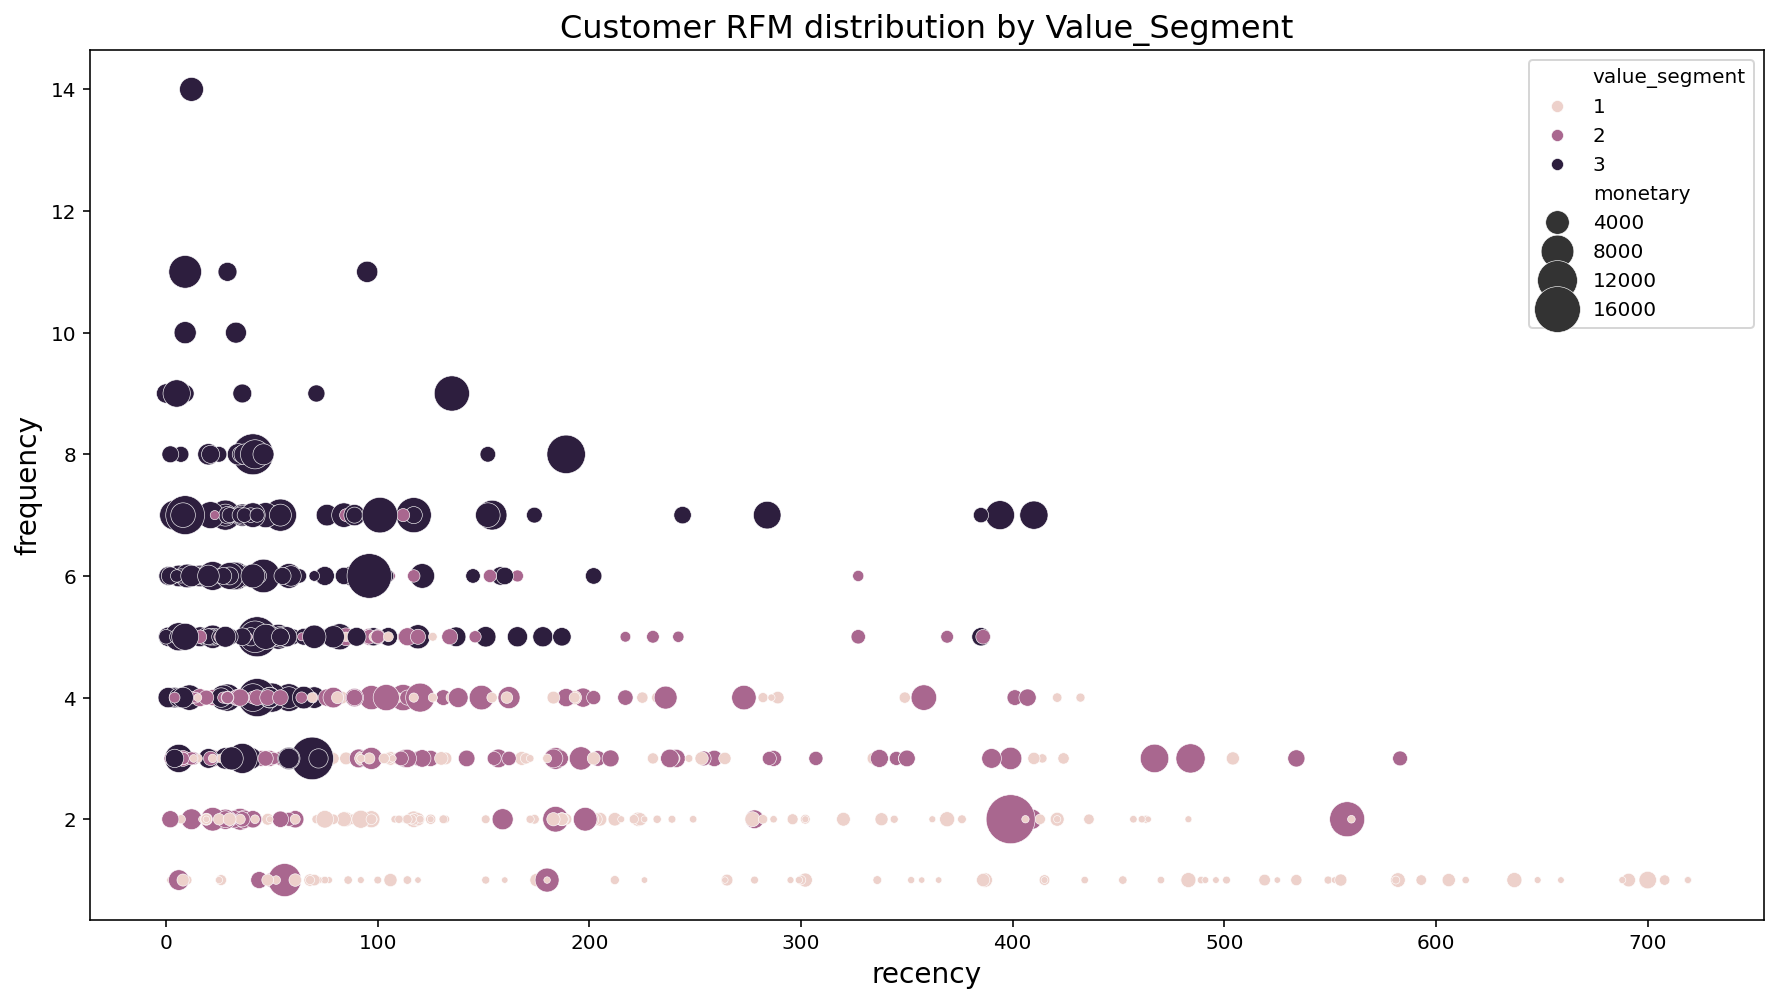

In [47]:
# Let's do a scatter plot to explore the distribution of customers' RFM profiles

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=rfm_df, x='recency', y='frequency', size=rfm_df['monetary'], hue='value_segment', sizes=(10,600))
ax.set_xlabel('recency', fontsize=14)
ax.set_ylabel('frequency', fontsize=14)
ax.set_title('Customer RFM distribution by Value_Segment', fontsize=16)
plt.show()

# Using 'monetary' as the size of the points, we see that the majority of customers who spend the most have transacted frequently
# Segment 3: High frequent shoppers who mostly have shopped recently, have a lot of the big spenders
# Segment 2: Shoppers with medium purchase frequency, have some big spenders who havn't purchased in a while
# Segment 1: Infrequent buyers, very low spenders. Many have not purchased in a long time. 

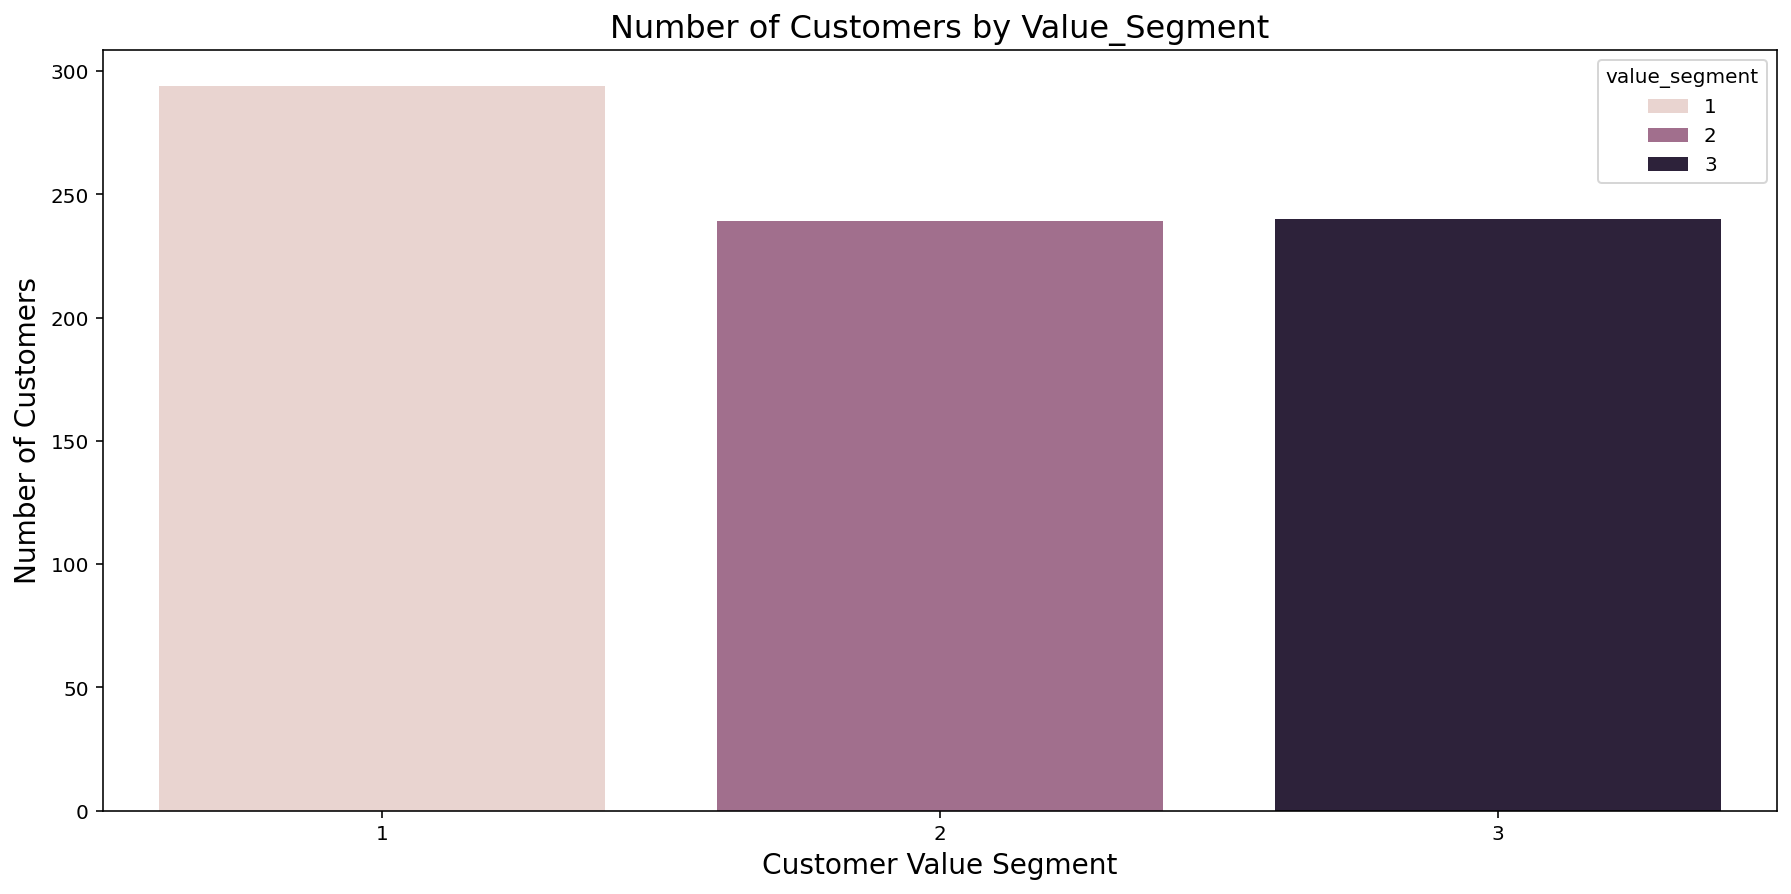

In [48]:
# Check the distribution of customers by value_segment

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=rfm_df, x='value_segment', hue='value_segment')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)
ax.set_title('Number of Customers by Value_Segment', fontsize=16)
plt.show()

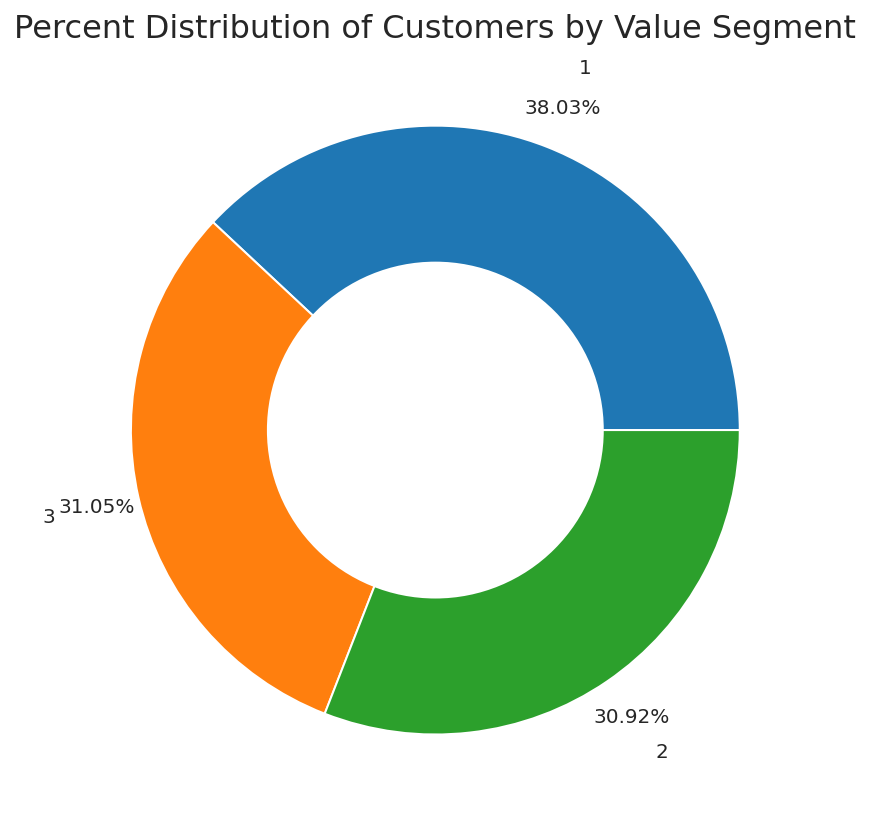

In [49]:
# Checking the percent distribution of customers by value_segement

perc_share_by_segment = rfm_df['value_segment'].value_counts()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,7))
ax.pie(perc_share_by_segment.values, labels=perc_share_by_segment.index, autopct='%1.2f%%', pctdistance=1.14, labeldistance=1.28)
ax.set_title('Percent Distribution of Customers by Value Segment', fontsize=16)

# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

fig.show()

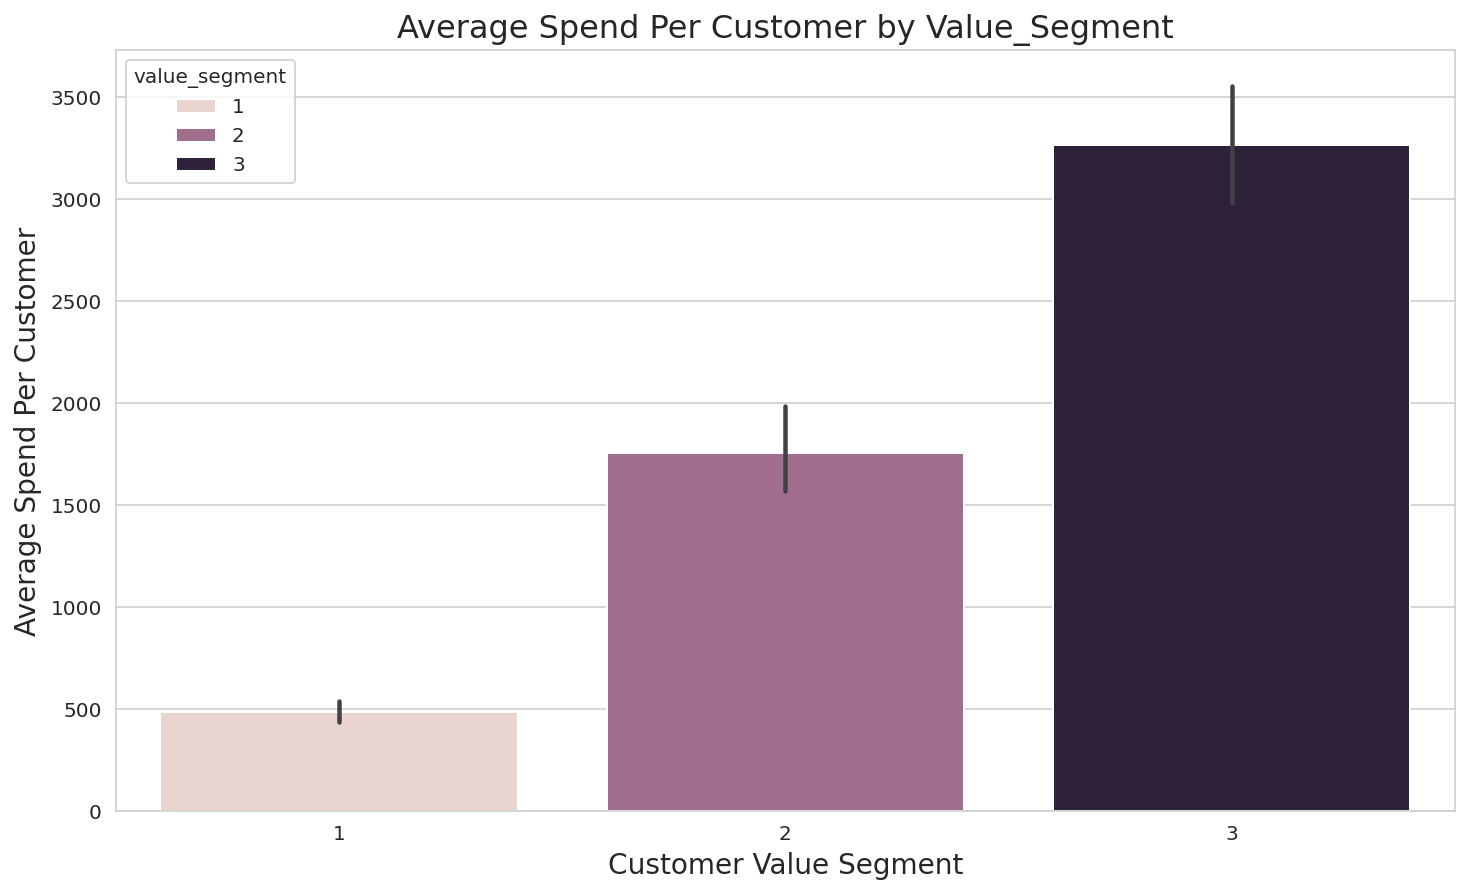

In [50]:
# Check the average spend per customer by value_segment
# We see that Segment 3 has the highest value customers while segment 1 has the least value customers.

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=rfm_df, x='value_segment', y='monetary', estimator=np.mean, hue='value_segment')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Spend Per Customer', fontsize=14)
ax.set_title('Average Spend Per Customer by Value_Segment', fontsize=16)
plt.show()


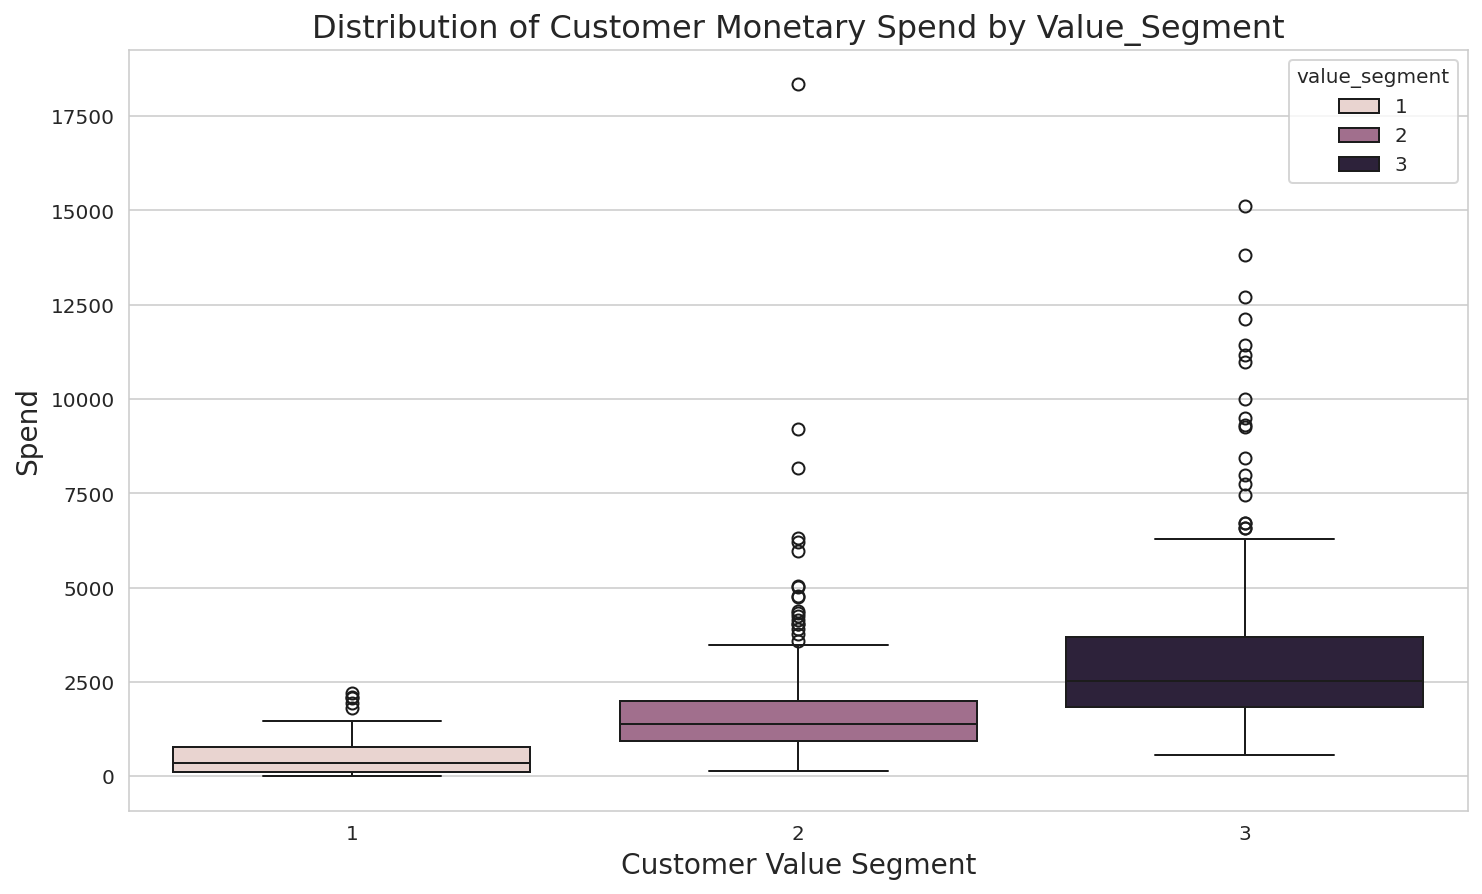

In [51]:
# Check the distribution of total monetary spend by value_segment
# The highest spend customers are in Segments 2 & 3. We cannot afford to loose these customers! These customers should be prioritized in these groups.

fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=rfm_df, x='value_segment', y='monetary', hue='value_segment')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Spend', fontsize=14)
ax.set_title('Distribution of Customer Monetary Spend by Value_Segment', fontsize=16)
plt.show()

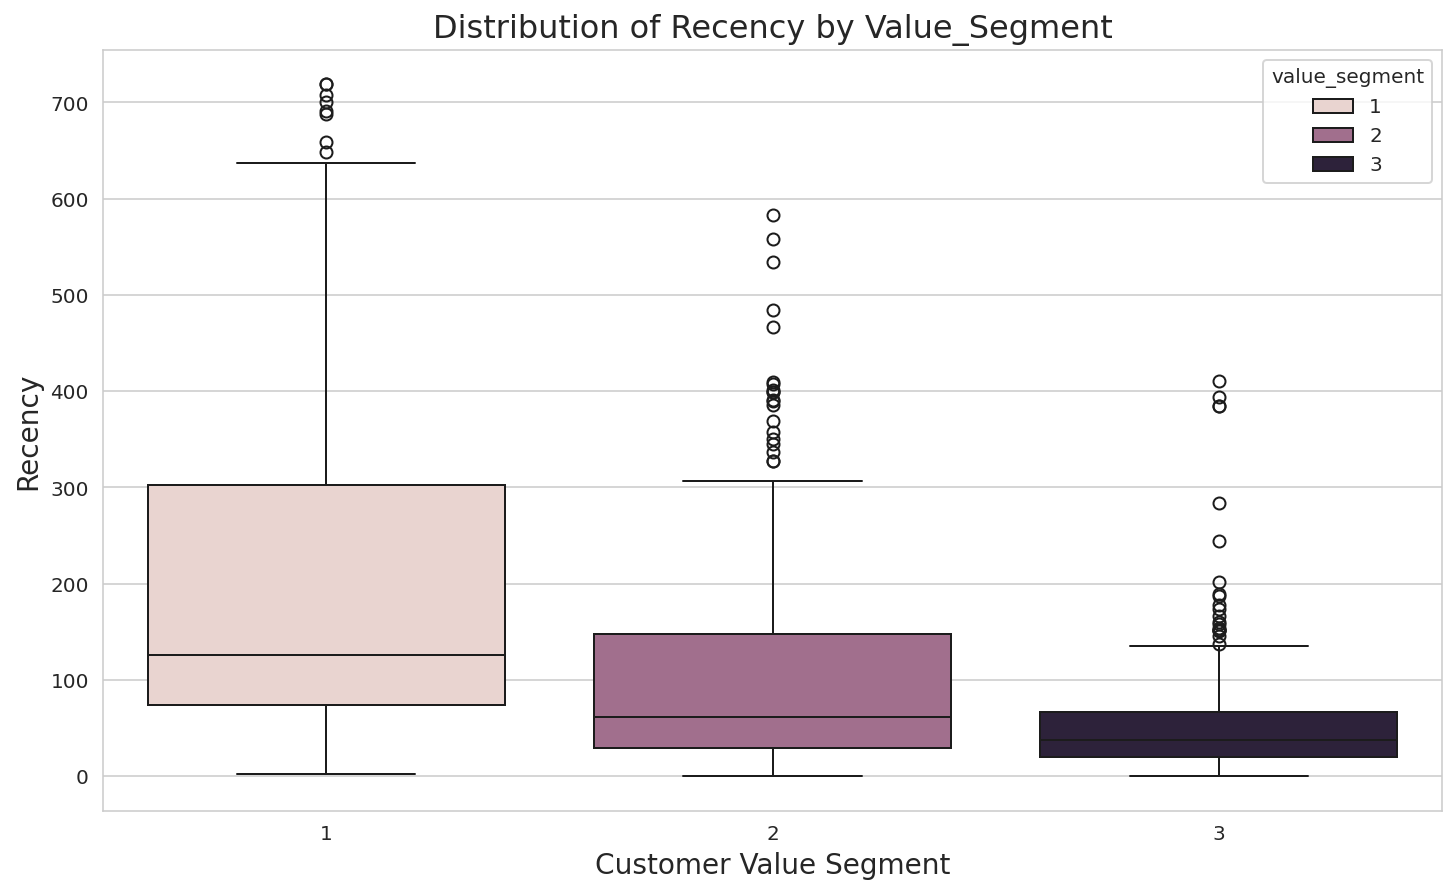

In [52]:
# Check the distribution of recency by value_segment

fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=rfm_df, x='value_segment', y='recency', hue='value_segment')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Recency', fontsize=14)
ax.set_title('Distribution of Recency by Value_Segment', fontsize=16)
plt.show()

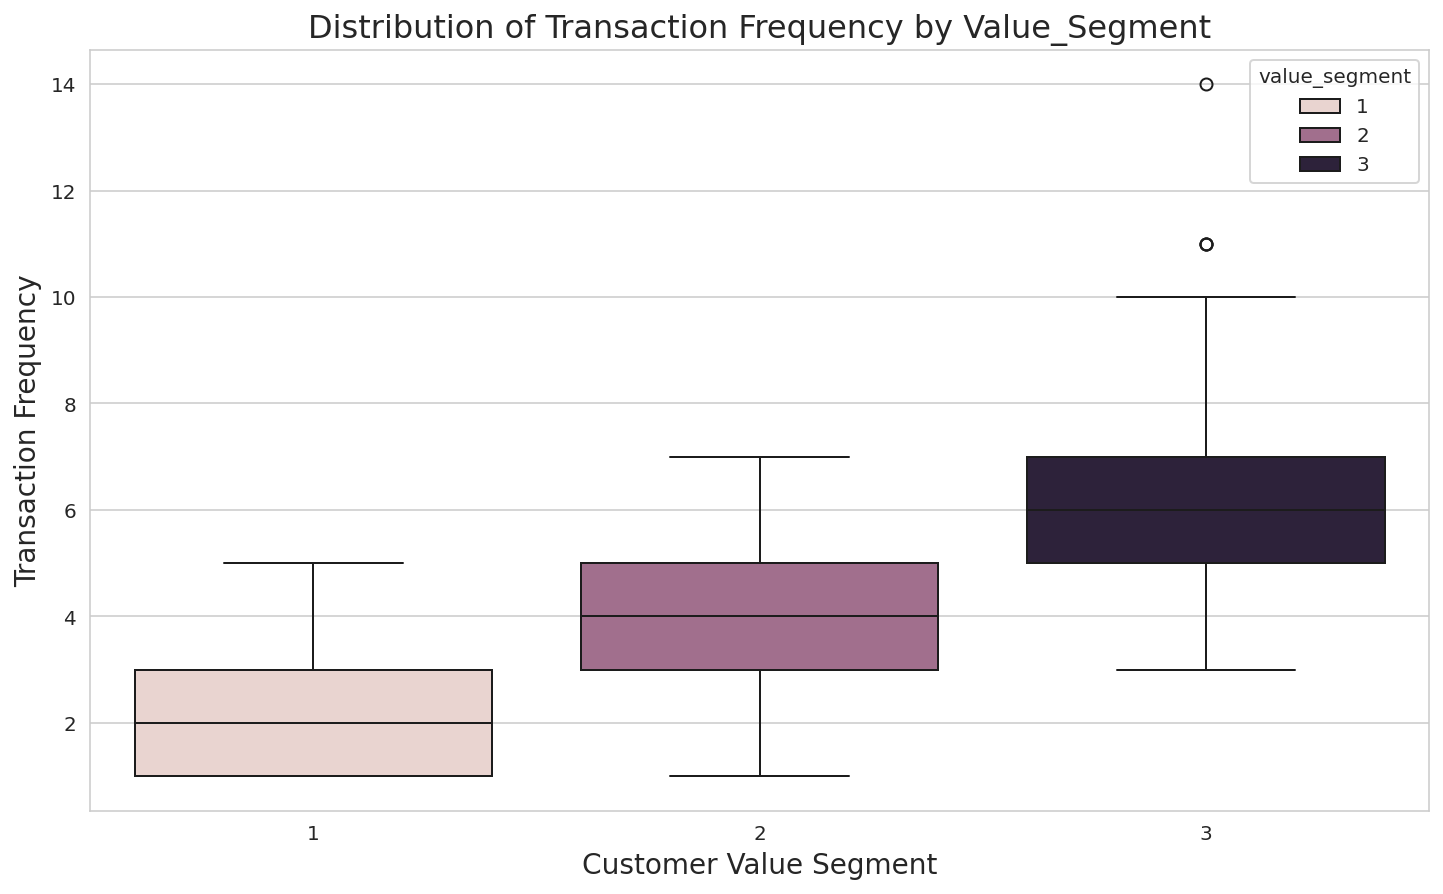

In [53]:
# Check the distribution of Transaction Frequency by value_segment

# The most frequent shoppers are in Segment 3. 

fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=rfm_df, x='value_segment', y='frequency', hue='value_segment')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Transaction Frequency', fontsize=14)
ax.set_title('Distribution of Transaction Frequency by Value_Segment', fontsize=16)
plt.show()

##### **Assign Cash Reward Offers to Customer Segments**



In [54]:
# Firstly, let's replace the rfm value_segment values with meaningful labels. 

segment_name_mapping = {3 : 'Champions', 2 : 'Loyalists', 1 : 'At Risk'}

rfm_df['value_segment'] = rfm_df['value_segment'].map(segment_name_mapping)

rfm_df

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,value_segment
Customer ID,,,,,,,,
AA-10315,184,2,4780.552,1,1,4,2.2,Loyalists
AA-10375,19,4,737.020,4,2,2,2.4,Loyalists
AA-10480,259,3,1763.052,1,2,3,2.2,Loyalists
AA-10645,55,3,1681.145,3,2,3,2.6,Loyalists
AB-10015,415,1,563.940,1,1,2,1.4,At Risk
...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3,3.4,Champions
YC-21895,4,3,2322.160,4,2,4,3.2,Champions
YS-21880,9,5,5340.264,4,3,4,3.6,Champions


In [55]:
# Assign cash reward offers to customers based on their value_segment label

reward_offer_map = {'Champions' : 300, 'Loyalists' : 200, 'At Risk' : 50}

rfm_df['Cash Reward'] = rfm_df['value_segment'].map(reward_offer_map)

In [56]:
# Save the final rfm_df dataframe to file

rfm_df.to_excel('RFM_Final_Output.xlsx')

###### **Adding RFM Variables to Original Dataset for more Insights**

Next, we will add the RFM Value Segment labels to the obs\_df transaction data that was originally used for performing the RFM analysis. This will help us understand the customer purchasing behaviors of each customer value segment by analysing other transaction features for more insights.



In [57]:
obs_df['value_segment'] = obs_df['Customer ID'].apply(lambda x : rfm_df.loc[x,'value_segment'])
df2 = obs_df.copy()
df2.head(5)

/tmp/ipykernel_1935/3360337230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['value_segment'] = obs_df['Customer ID'].apply(lambda x : rfm_df.loc[x,'value_segment'])


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,value_segment
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,At Risk
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,At Risk
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Loyalists
13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Loyalists
14,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,At Risk


In [58]:
# Check the distribution of number of customers in each rfm value segment

df2['value_segment'].value_counts()

Champions    2966
Loyalists    1782
At Risk      1162
Name: value_segment, dtype: int64

### **Product Category Analysis**



In [59]:
# Let's create a new column called 'unit_cost' containing the ratio of Sales to quantity for each transaction.

df2['unit_cost'] = df2['Sales']/df2['Quantity']

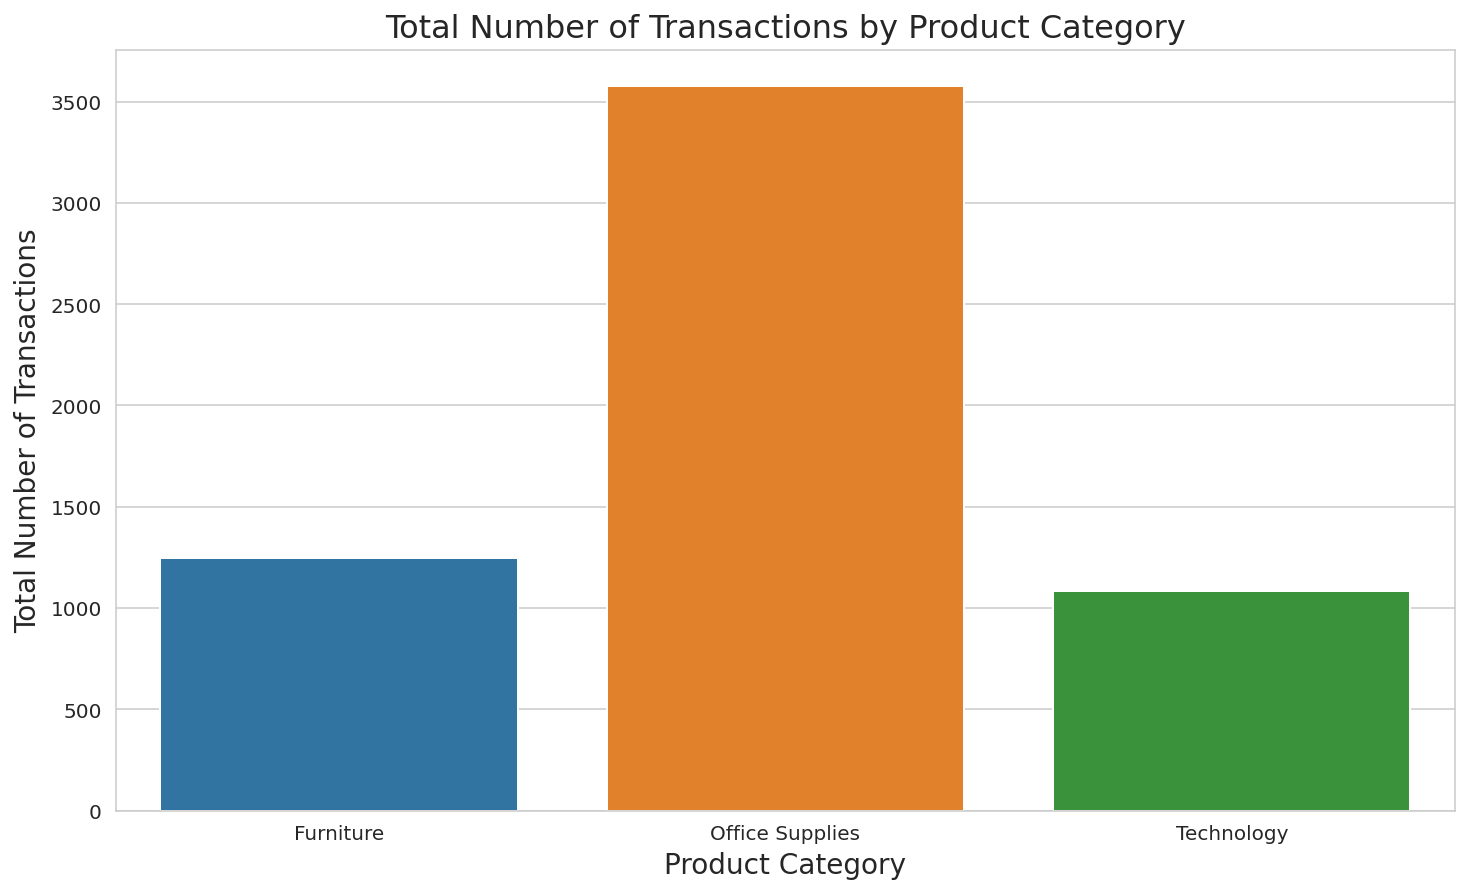

In [60]:
# Check the number of transactions by Product Category

# Customers shop the most in the Office Supplies Category. #Technology is the least shopped product category

fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=df2, x='Category', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Product Category', fontsize=16)
plt.show()

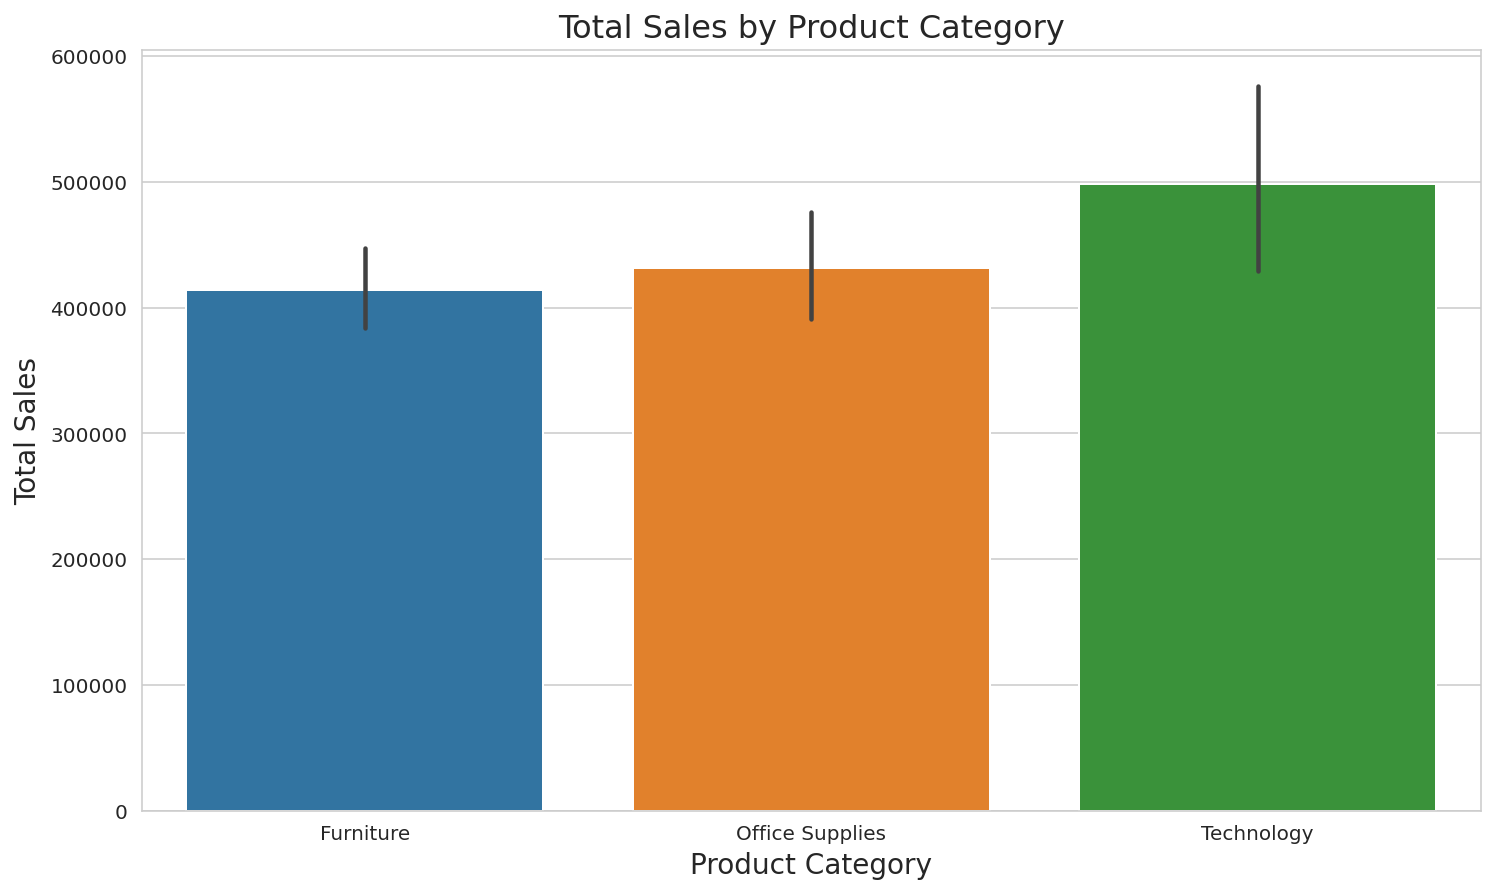

In [61]:
# Check which Product Category has the largest total amount of Sales

# The Technology Product category has the largest amount of sales

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=df2, x='Category',  y='Sales', estimator=np.sum, hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Total Sales', fontsize=14)
ax.set_title(f'Total Sales by Product Category', fontsize=16)
plt.show()

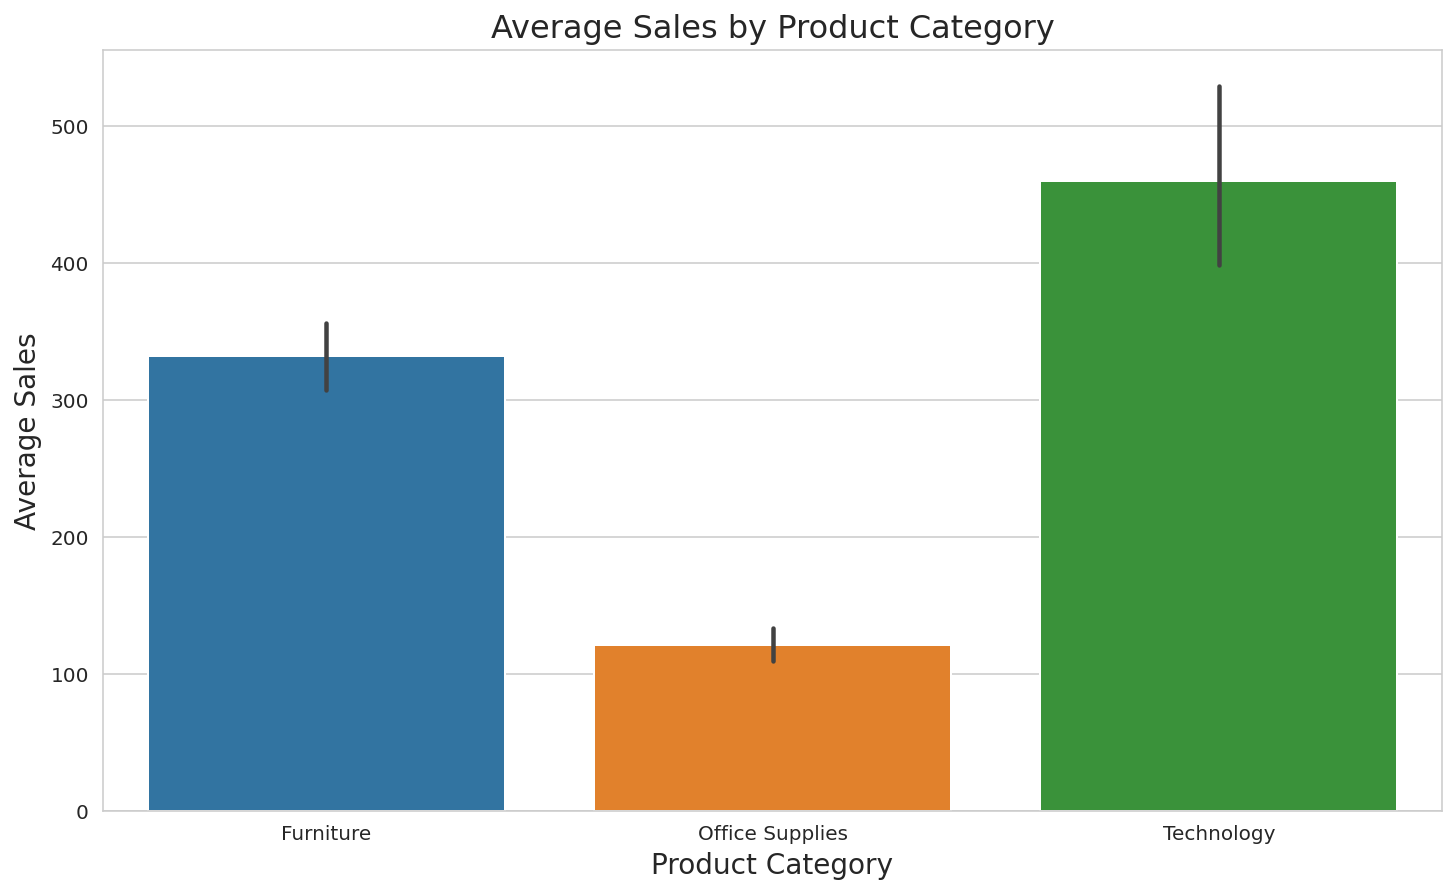

In [62]:
# Check which Product Category has the highest average Sales

# The technology products have the highest average sales value

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=df2, x='Category',  y='Sales', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Average Sales', fontsize=14)
ax.set_title(f'Average Sales by Product Category', fontsize=16)
plt.show()

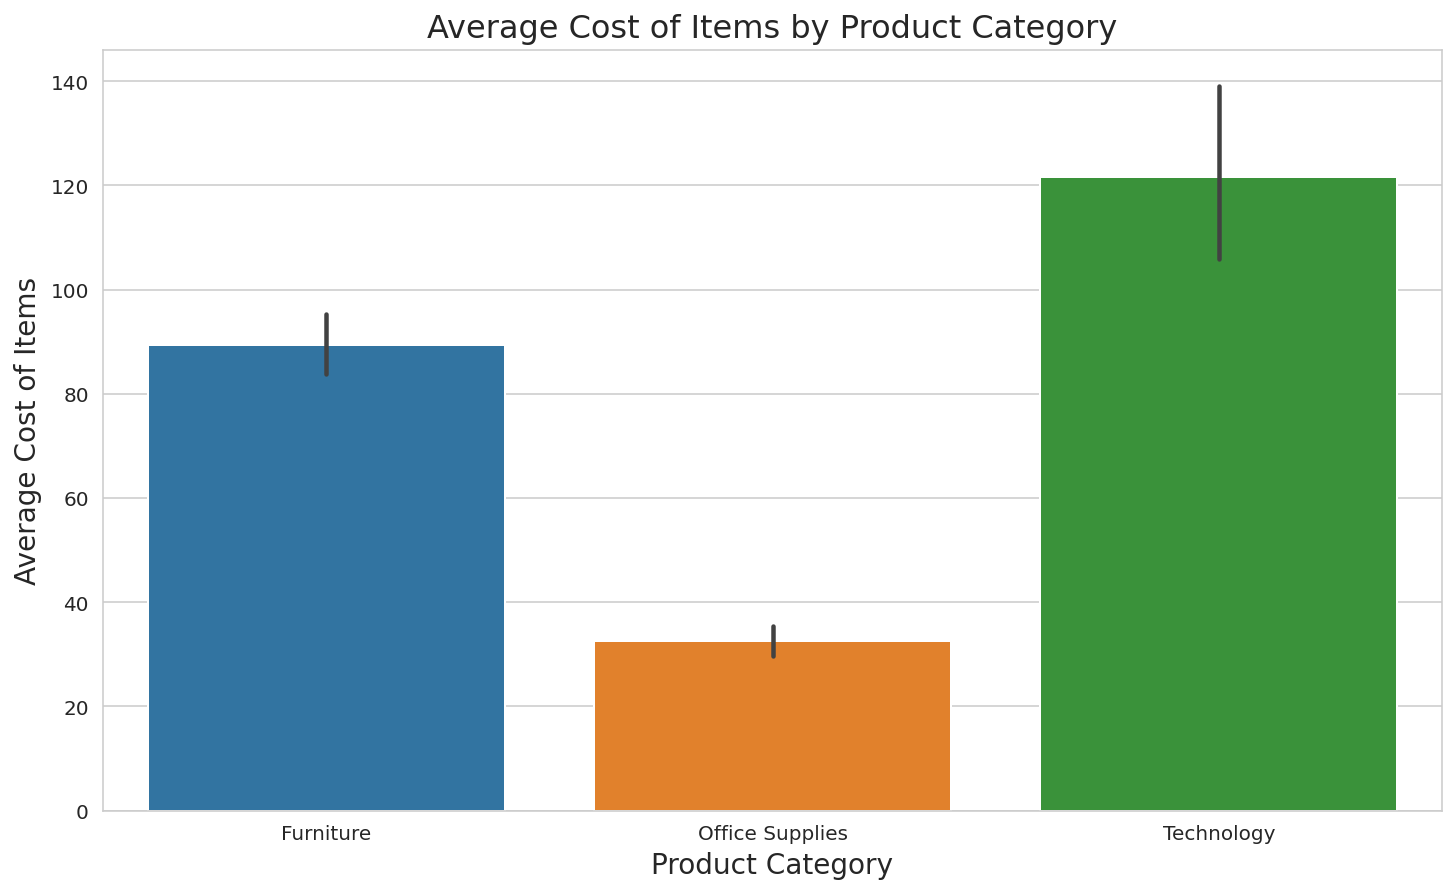

In [63]:
# Check the average cost of each Product Category Item

# The Technology product items are the most expensive. Office Supplies are least expensive items

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=df2, x='Category', y='unit_cost', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Average Cost of Items', fontsize=14)
ax.set_title(f'Average Cost of Items by Product Category', fontsize=16)
plt.show()

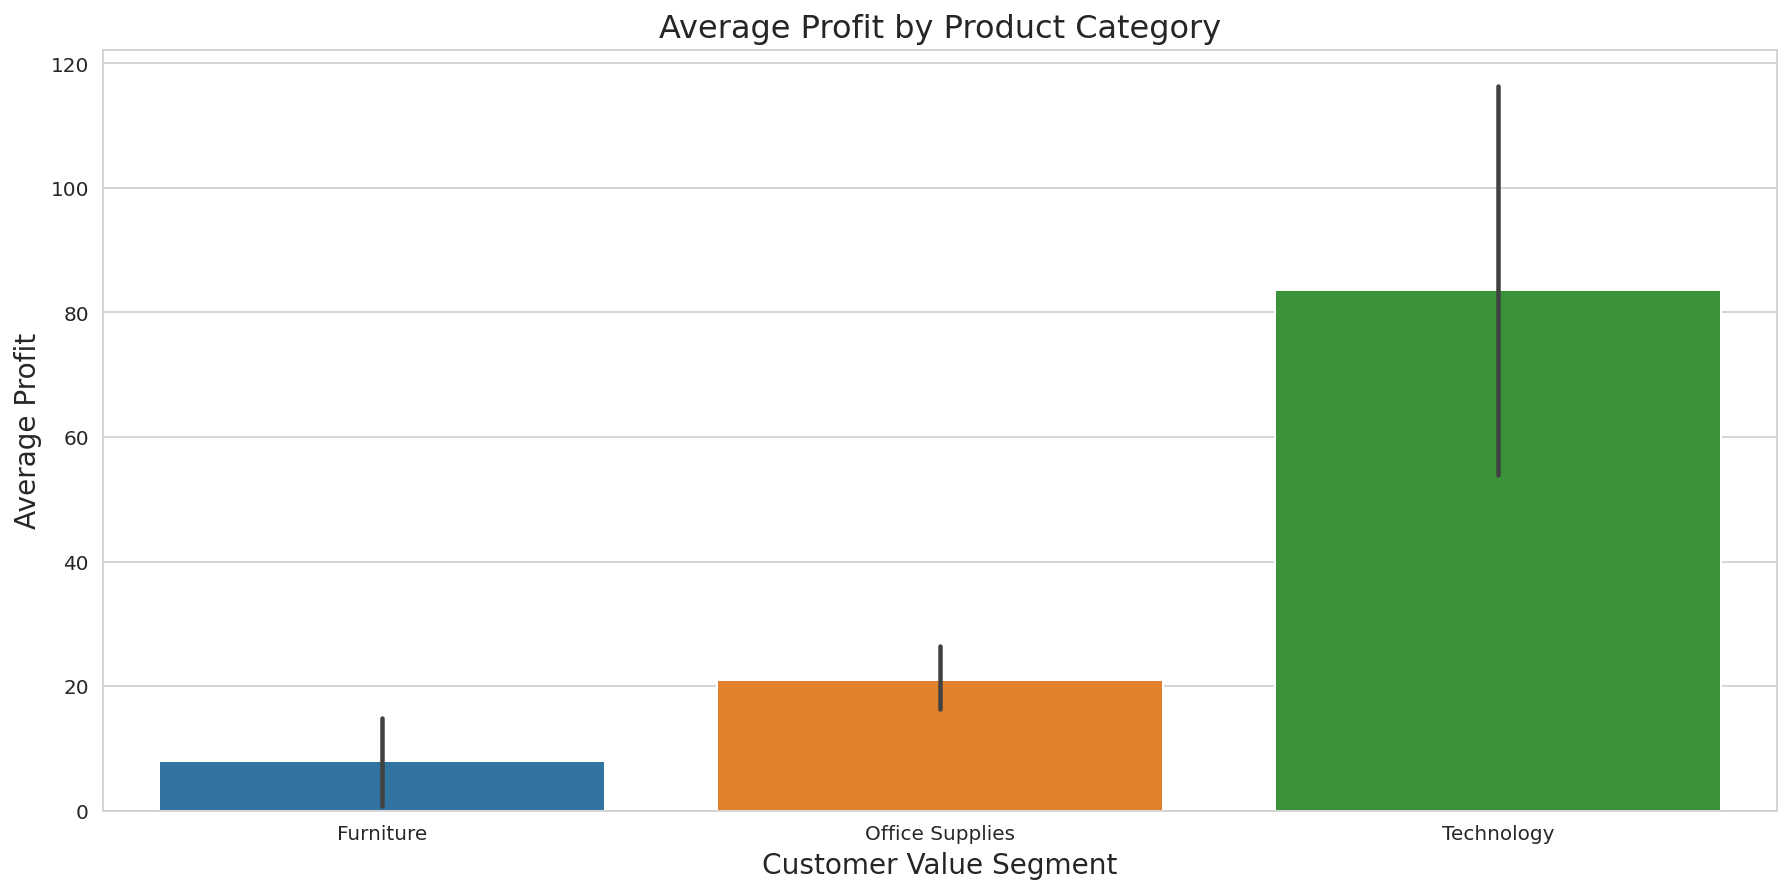

In [64]:
# Check which Product Category is the most profitable

# Technoglogy Products are the most profitable

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Category', y='Profit', estimator=np.mean, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title(f'Average Profit by Product Category', fontsize=16)
plt.show()

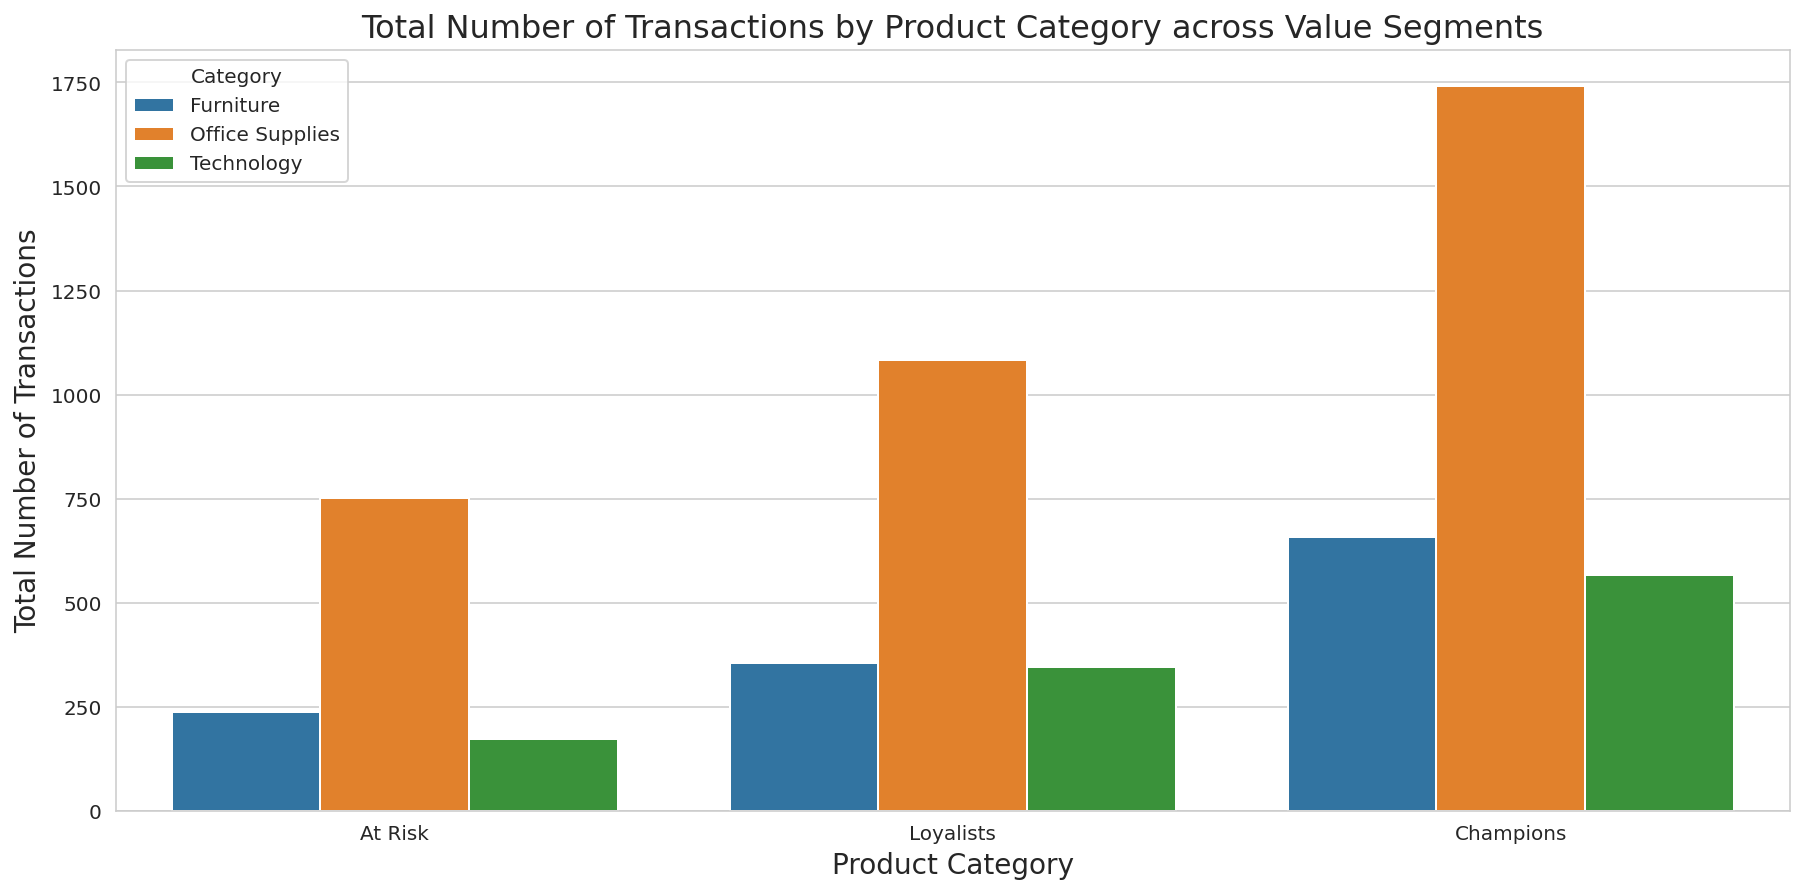

In [65]:
# Check the most shopped Product Category by rfm Value Segment

# At Risk customer segment has shopped the least in all three product categories 

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='value_segment', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Product Category across Value Segments', fontsize=16)
plt.show()

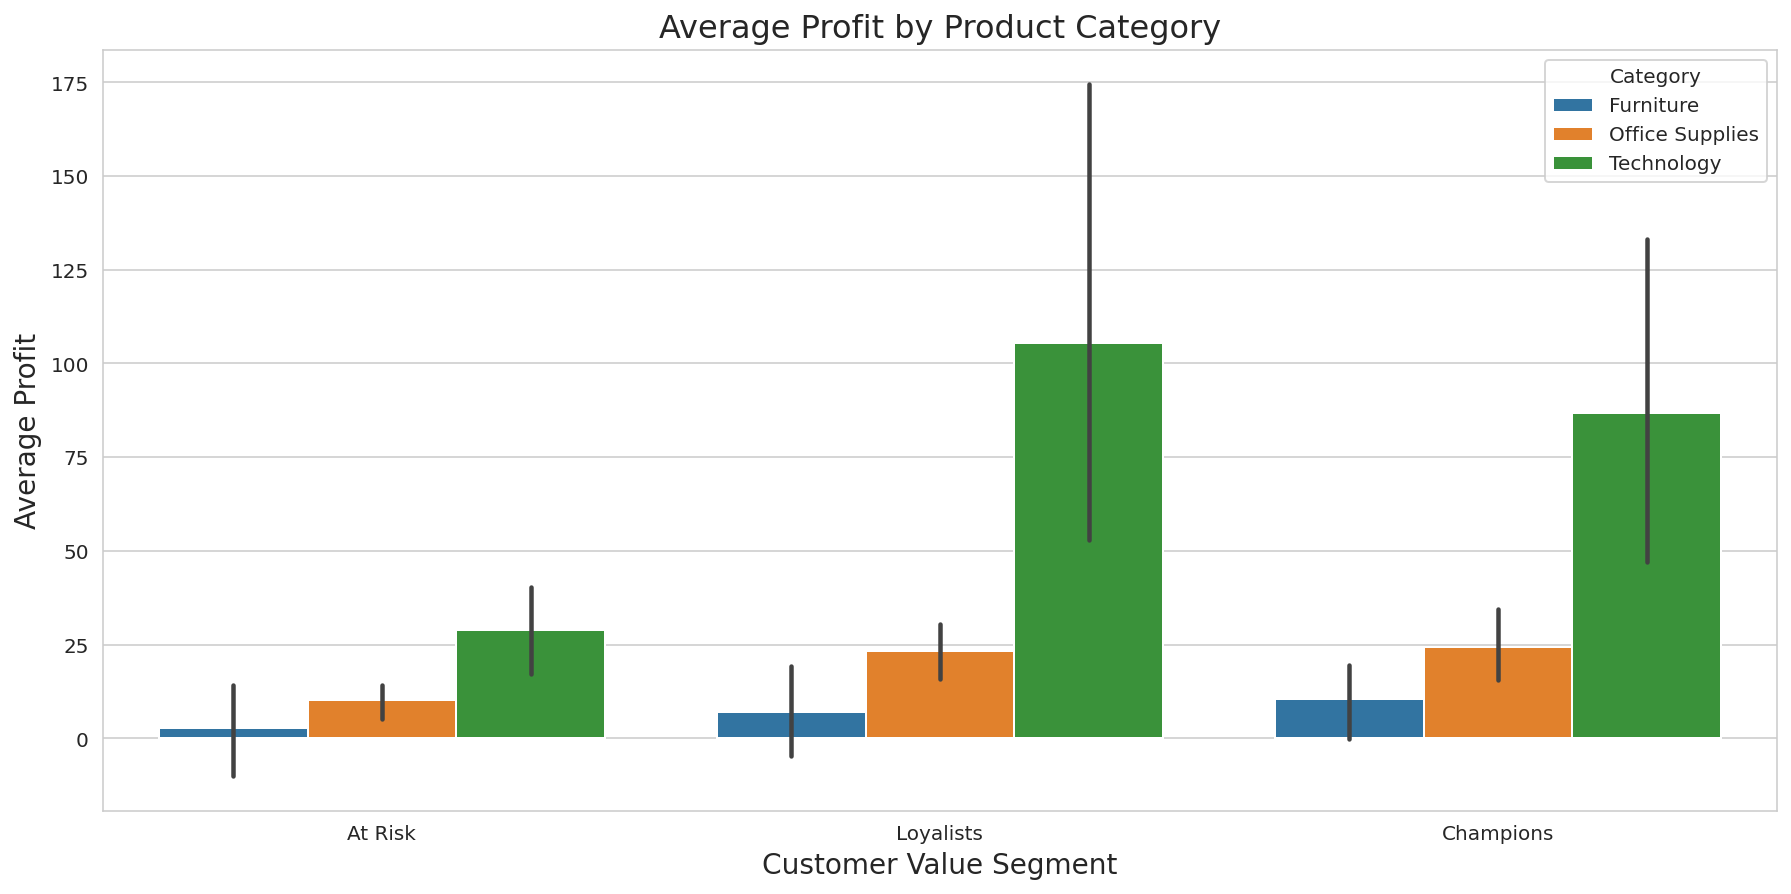

In [66]:
# Check the average profit by rfm value segment in each product category

# The Loyalists Value Segment has the highest average profit per product in the Technology Product Category. 

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.mean, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title(f'Average Profit by Product Category', fontsize=16)
plt.show()

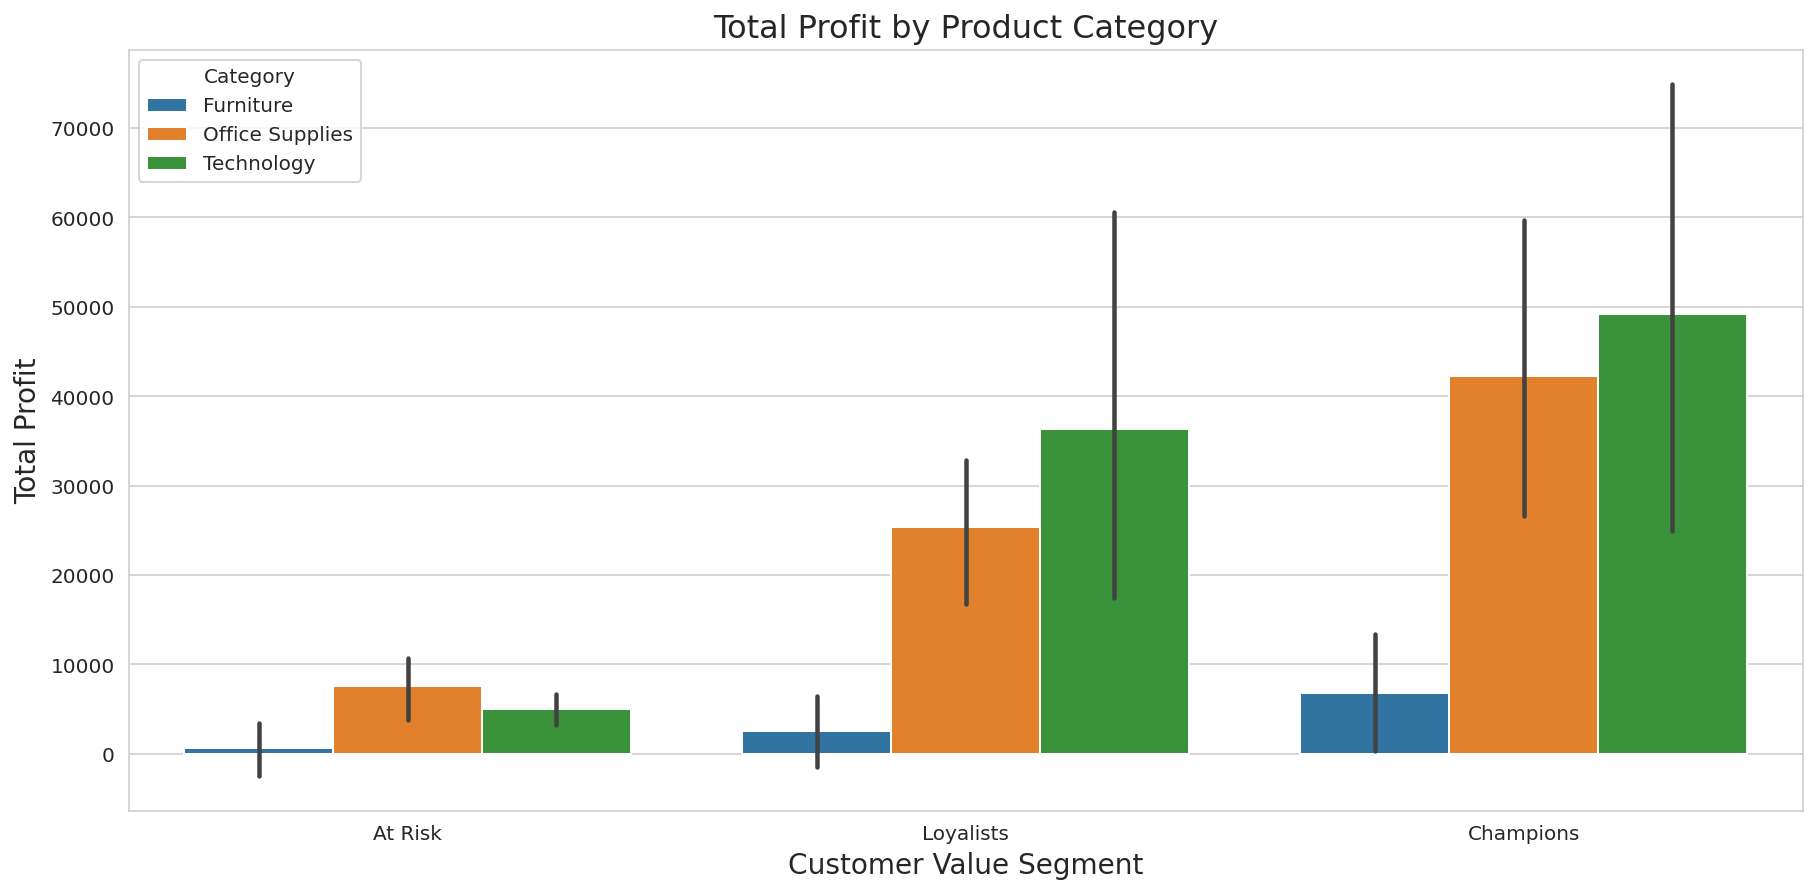

In [67]:
# Check the total profit by rfm value segment in each product category

# Value Segment 3 has the highest total profit in all three product categories.

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.sum, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Product Category', fontsize=16)
plt.show()

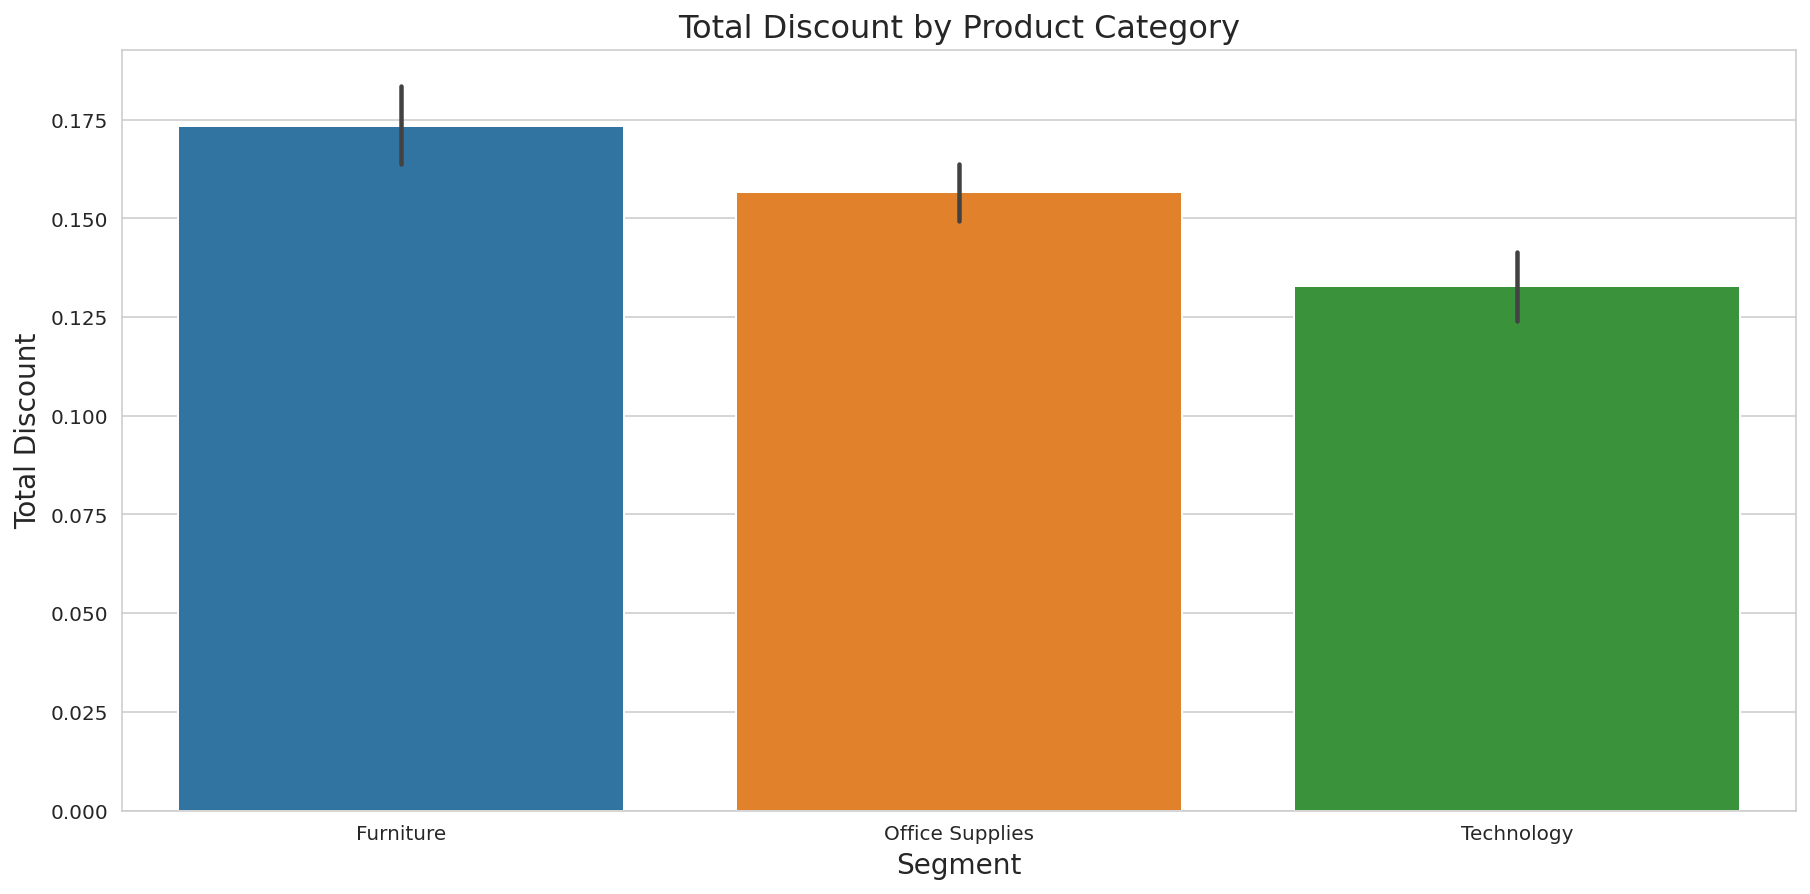

In [68]:
# Additional Insights here !!

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Category', y='Discount', estimator=np.mean, hue='Category')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Discount', fontsize=14)
ax.set_title(f'Total Discount by Product Category', fontsize=16)
plt.show()

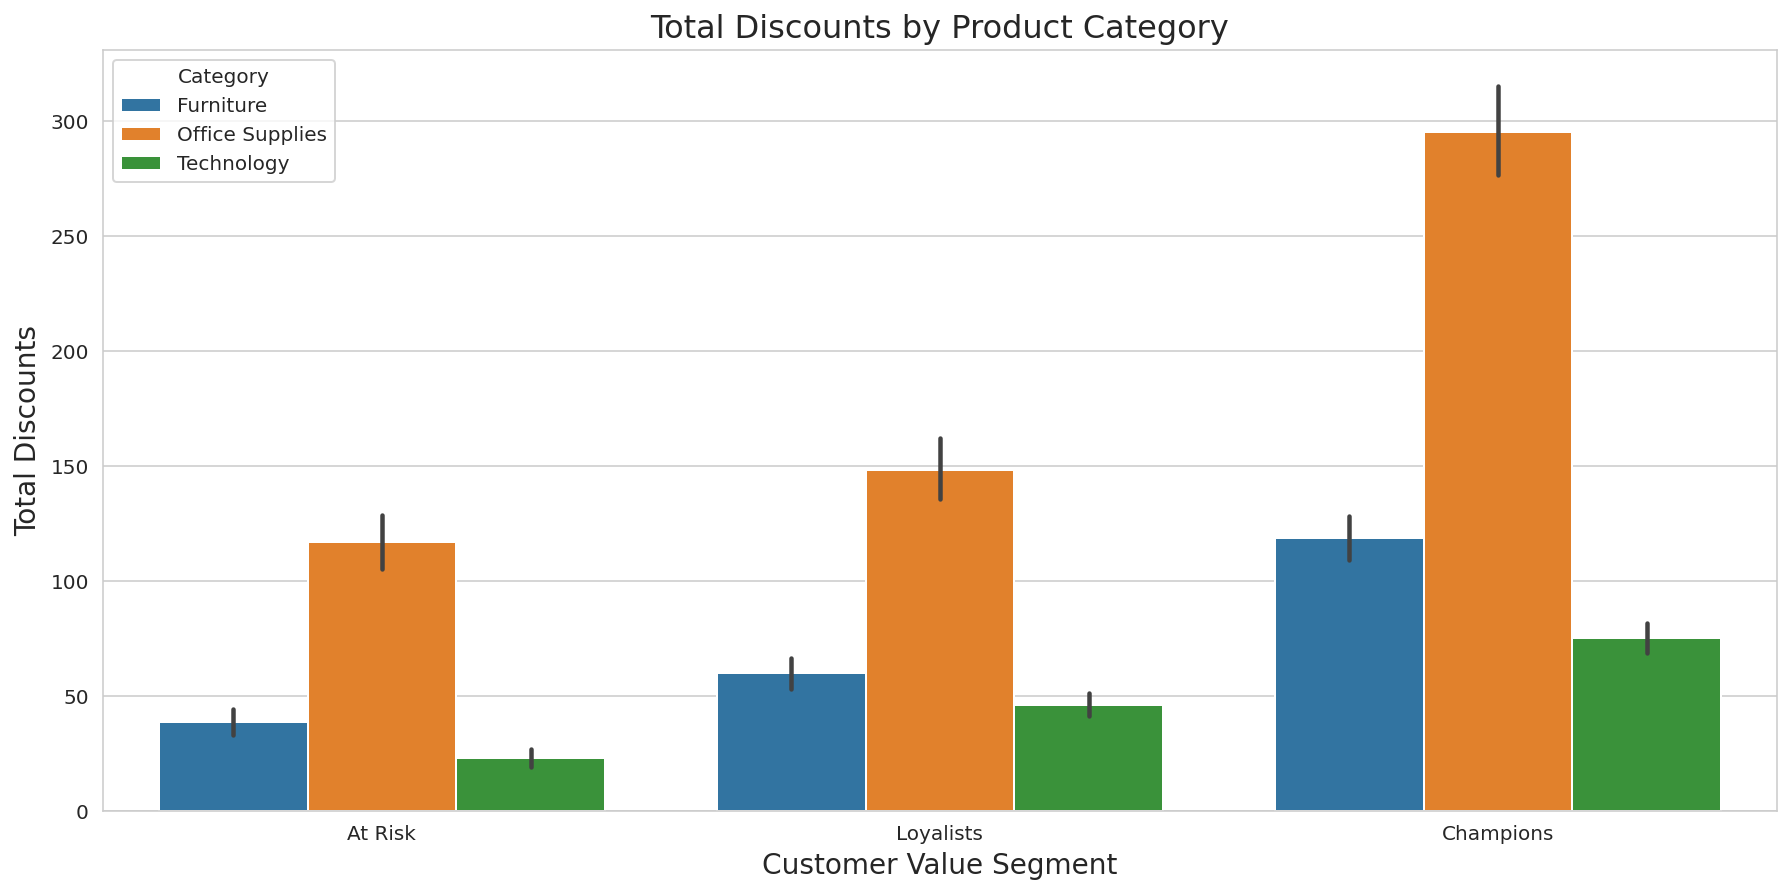

In [69]:
# Check the total amount of discounts by rfm value segment in each product category

# Office Supplies have the largest amount of discounts
# Segment 3 has the most discounts. We should check the average discounts too!!

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Discount', estimator=np.sum, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Total Discounts', fontsize=14)
ax.set_title(f'Total Discounts by Product Category', fontsize=16)
plt.show()

### Ship Mode Analysis

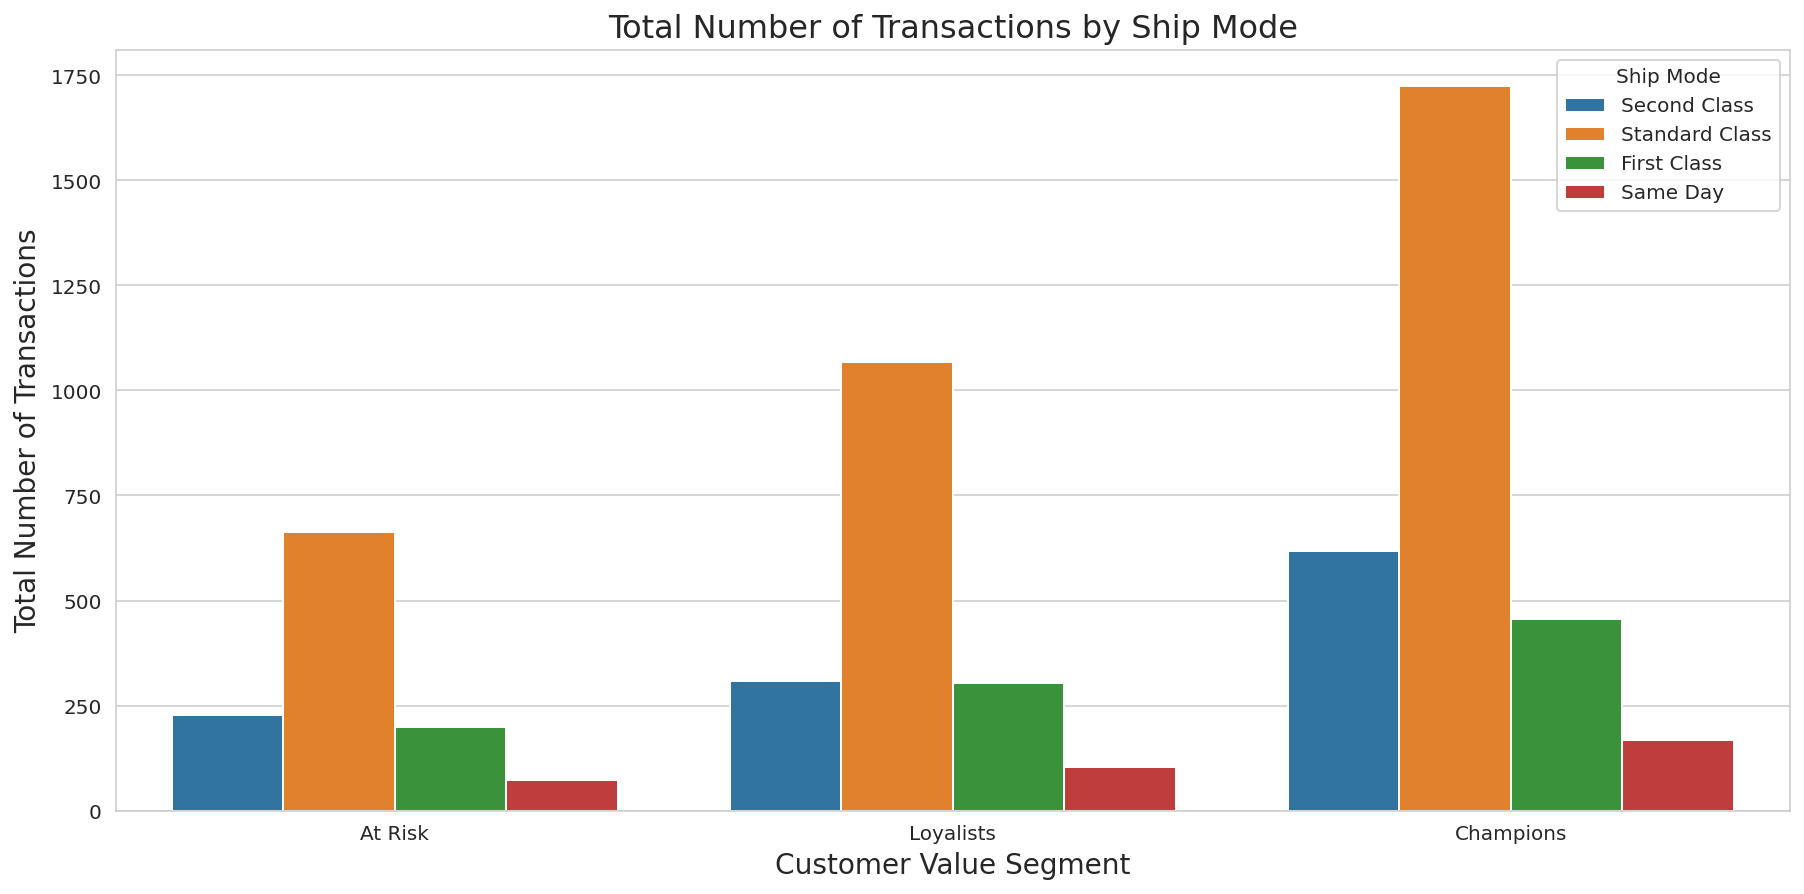

In [70]:
# Check which shipping mode is the most frequently used across rfm value segments

# The Standard Class is the most frequently used shipping mode cross all value segments.
# Same Day shipping mode is the least frequently used method.
# Champions value segment uses Standard Class and Second Class shipping modes the most

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='value_segment', hue='Ship Mode')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Ship Mode', fontsize=16)
plt.show()

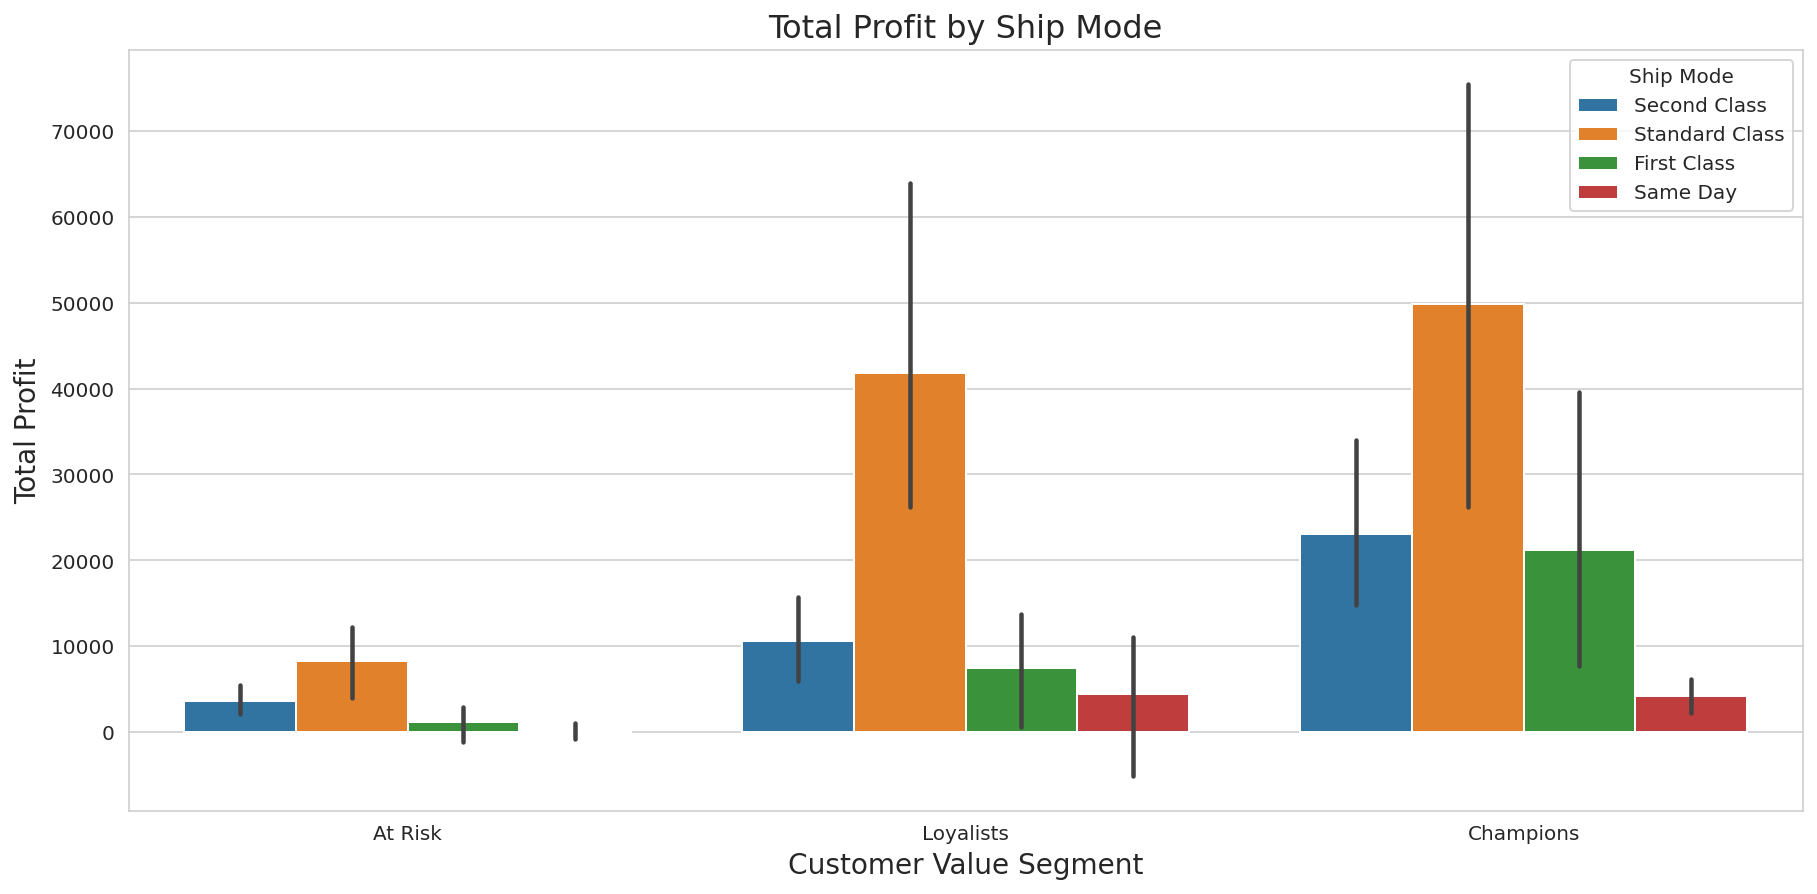

In [71]:
# Check the breakdown of Total Profit by rfm value_segment across all Ship Modes

# Superstore has lost some profits from transactions fulfilled by loyalists value segment using Same Day shipping mode

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.sum, hue='Ship Mode')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Ship Mode', fontsize=16)
plt.show()

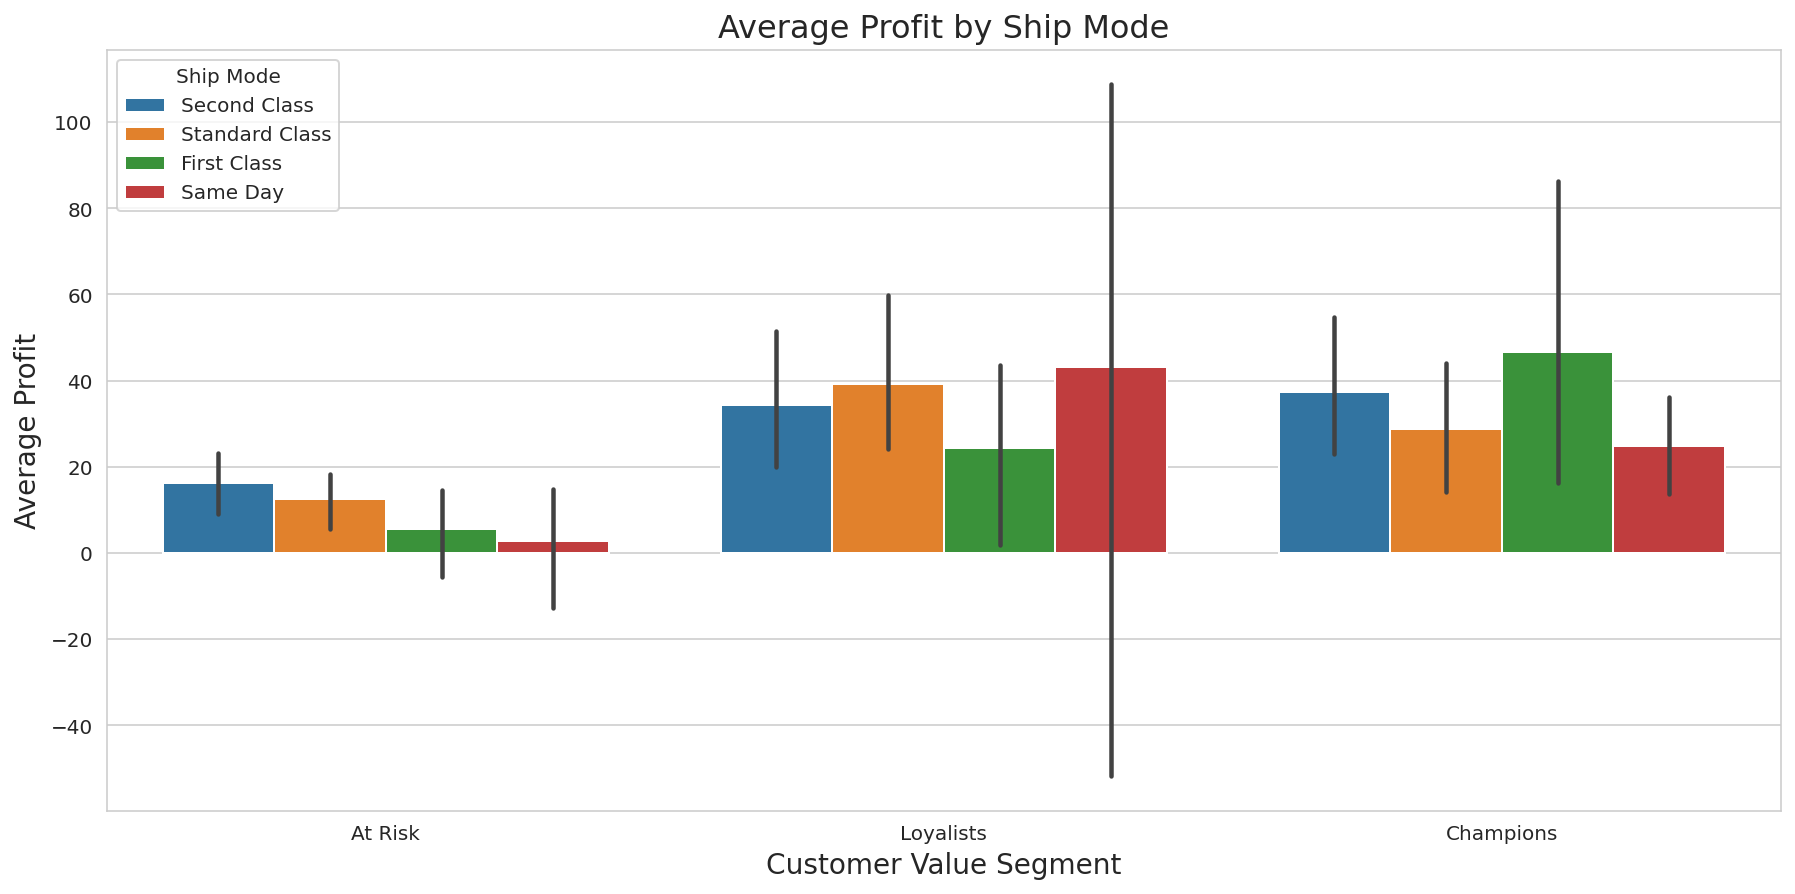

In [72]:
# Check the breakdown of Average Profit by rfm value_segment across all Ship Modes

# The Loyalists value segment has the highest proportion of transactions with negative profits in the Same Day shipping mode.

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.mean, hue='Ship Mode')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title(f'Average Profit by Ship Mode', fontsize=16)
plt.show()

### **Segment Analysis**

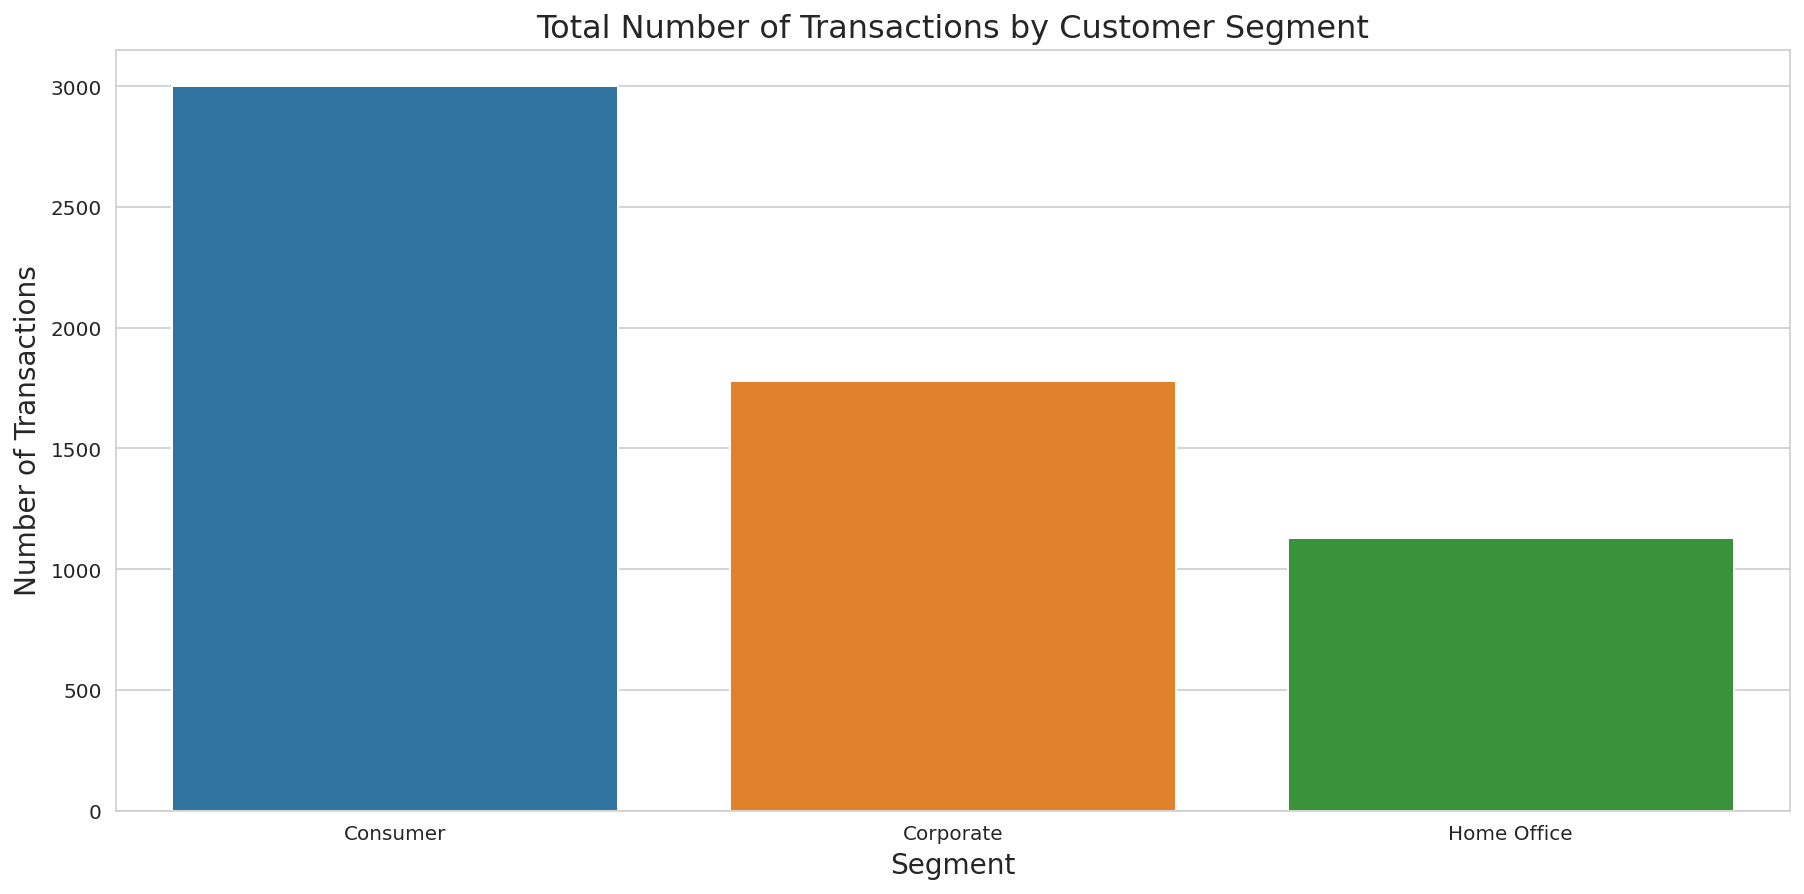

In [73]:
# Check total number of transactions by customer segment

# The Consumer customer segment has the highest number of transactions.

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Segment', hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Customer Segment', fontsize=16)
plt.show()

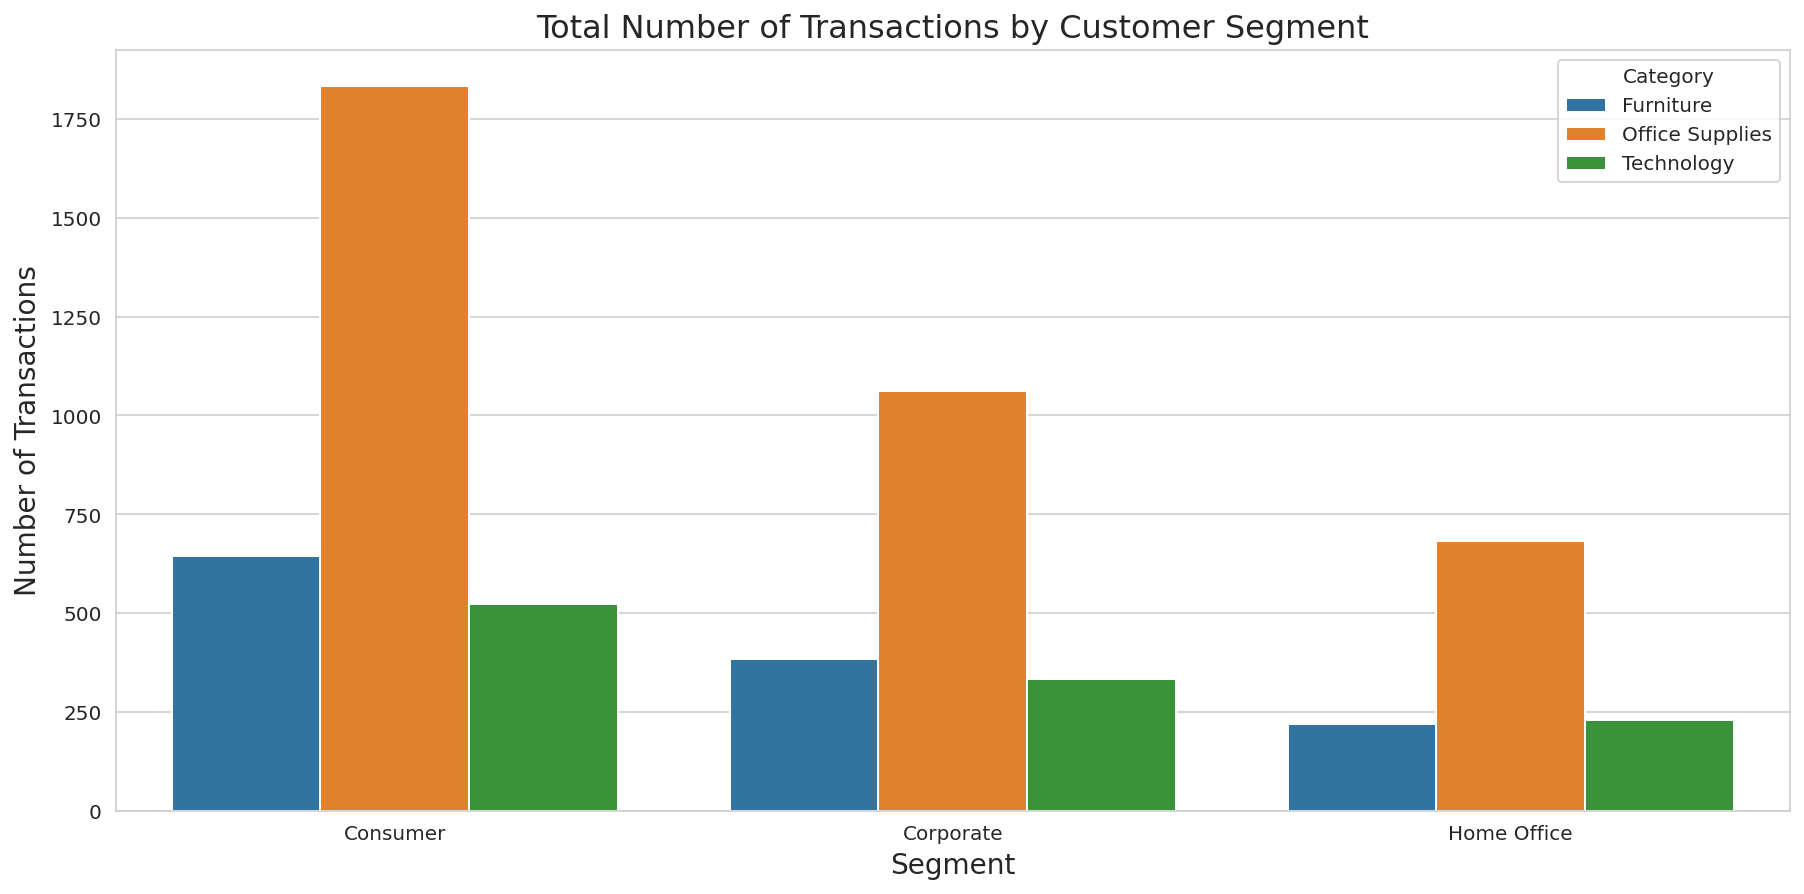

In [74]:
# Check which Product Categories are the Segments shopping the most?

# All segments shop more in the Office Supplies category but the Home Office Segment has a larger percentage of its' spend in Technology products

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Segment', hue='Category')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Customer Segment', fontsize=16)
plt.show()

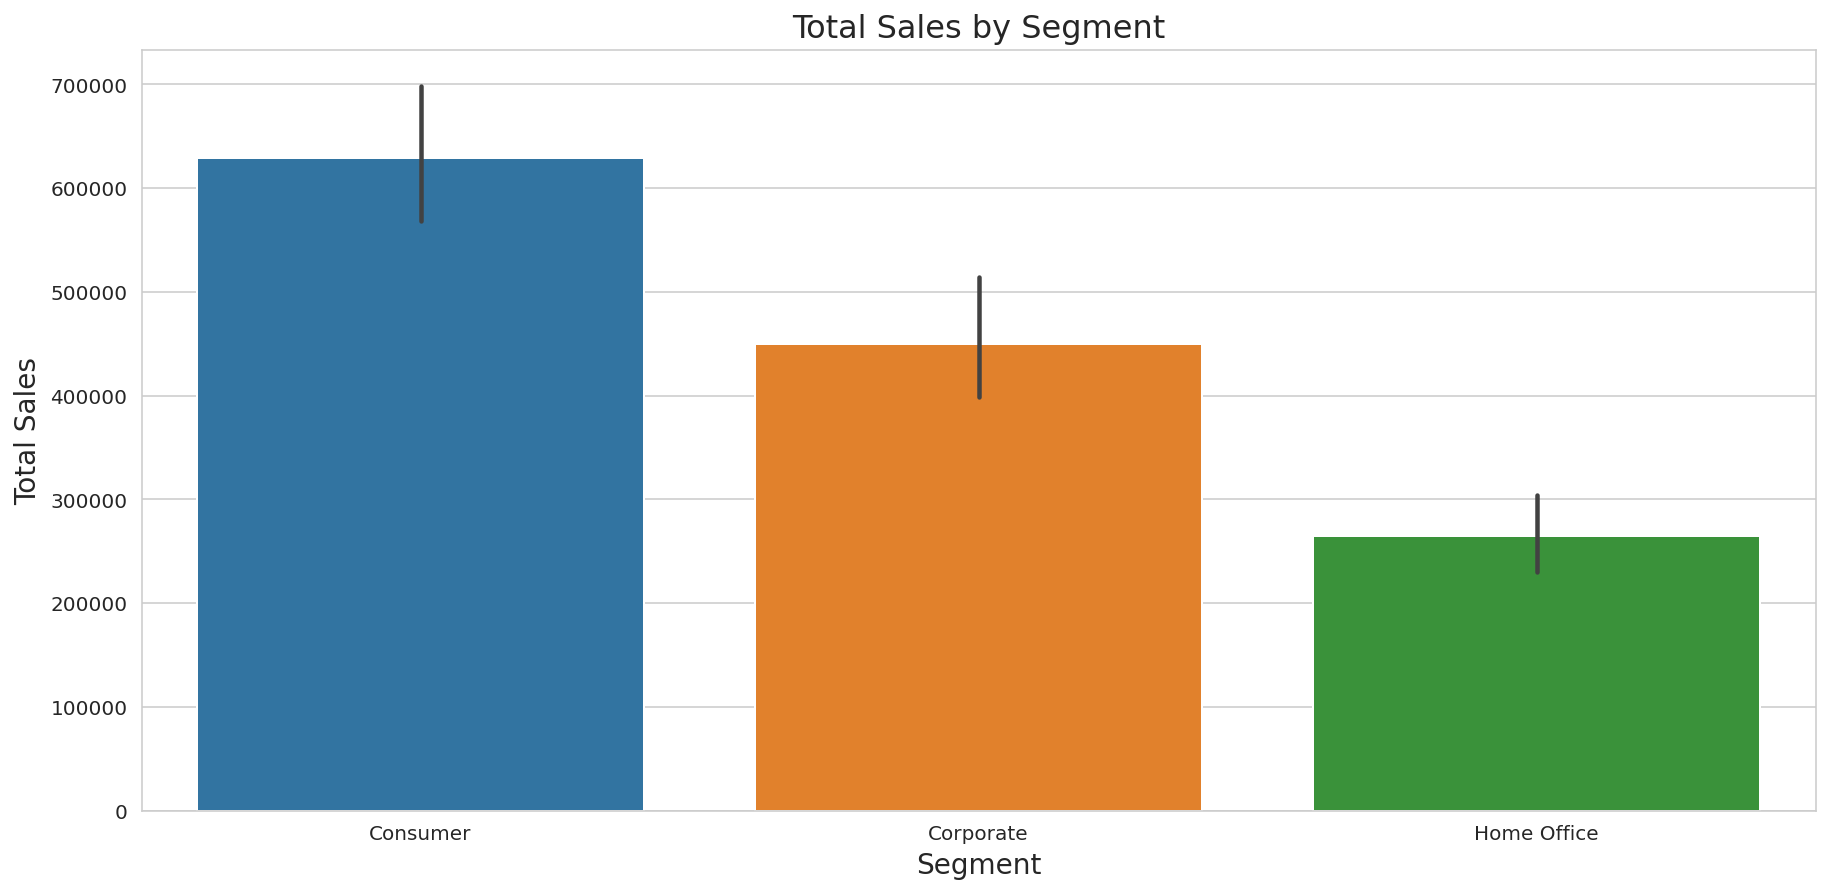

In [75]:
# Check the Customer Segment with most total Sales

# The Consumer Segment has the highest total Sales

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Sales', estimator=np.sum, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Sales', fontsize=14)
ax.set_title(f'Total Sales by Segment', fontsize=16)
plt.show()

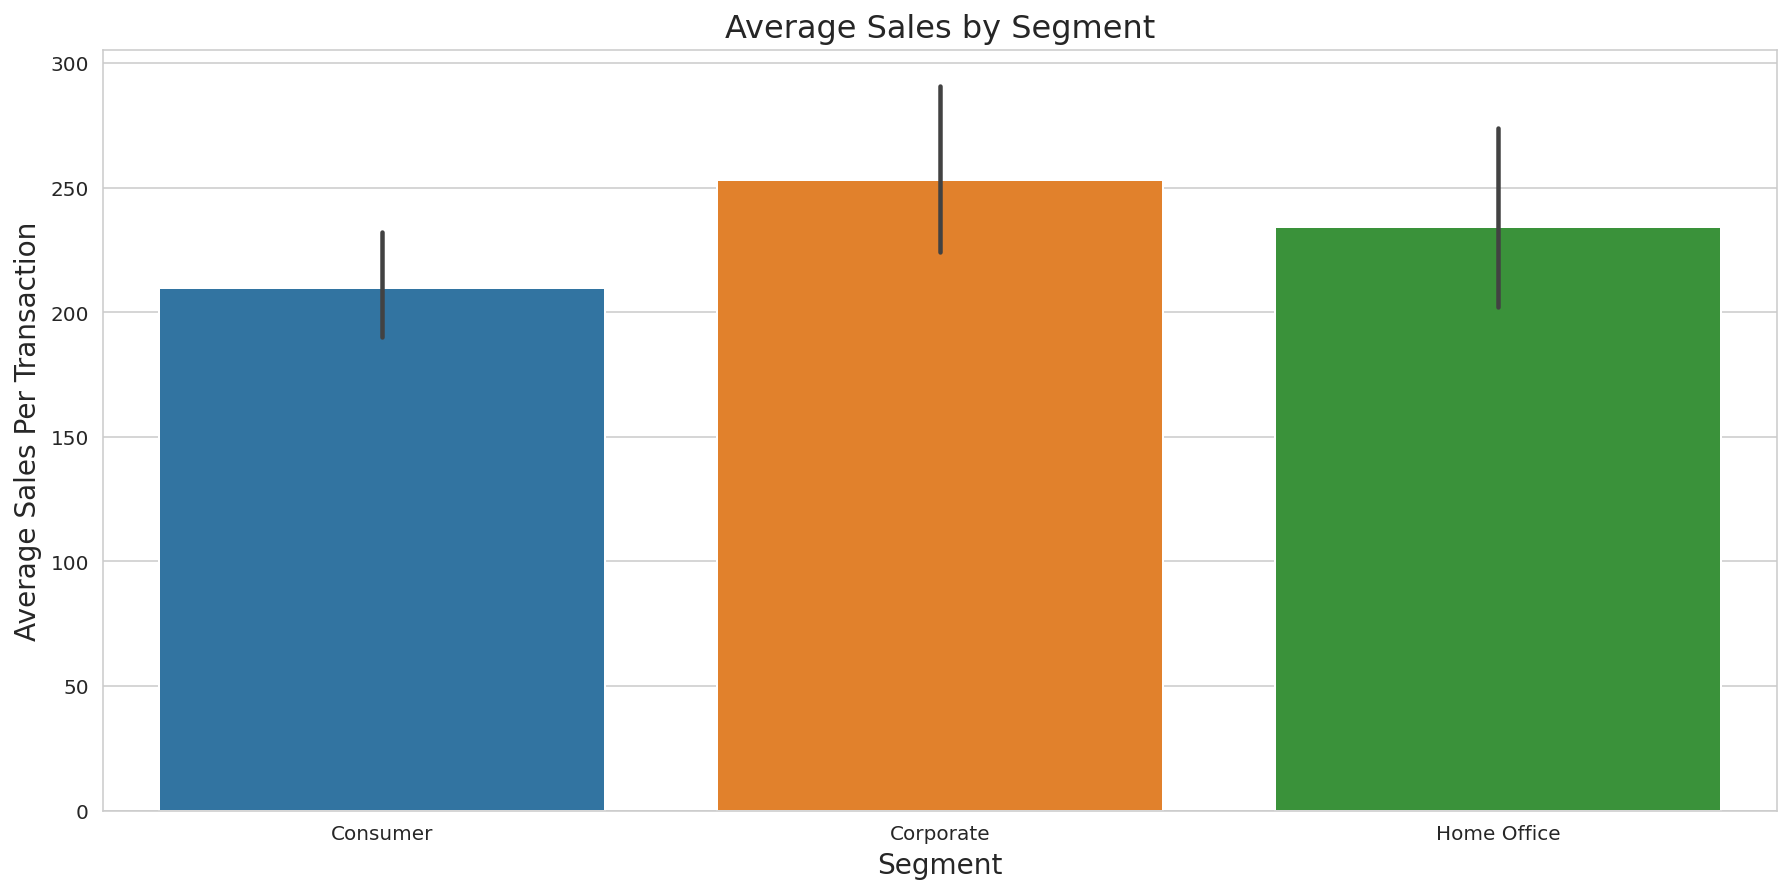

In [76]:
# Check the average Sales per Transaction across customer segments

# The Corporate Customer Segment has the highest average sales per transaction

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Sales', estimator=np.mean, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Average Sales Per Transaction', fontsize=14)
ax.set_title(f'Average Sales by Segment', fontsize=16)
plt.show()

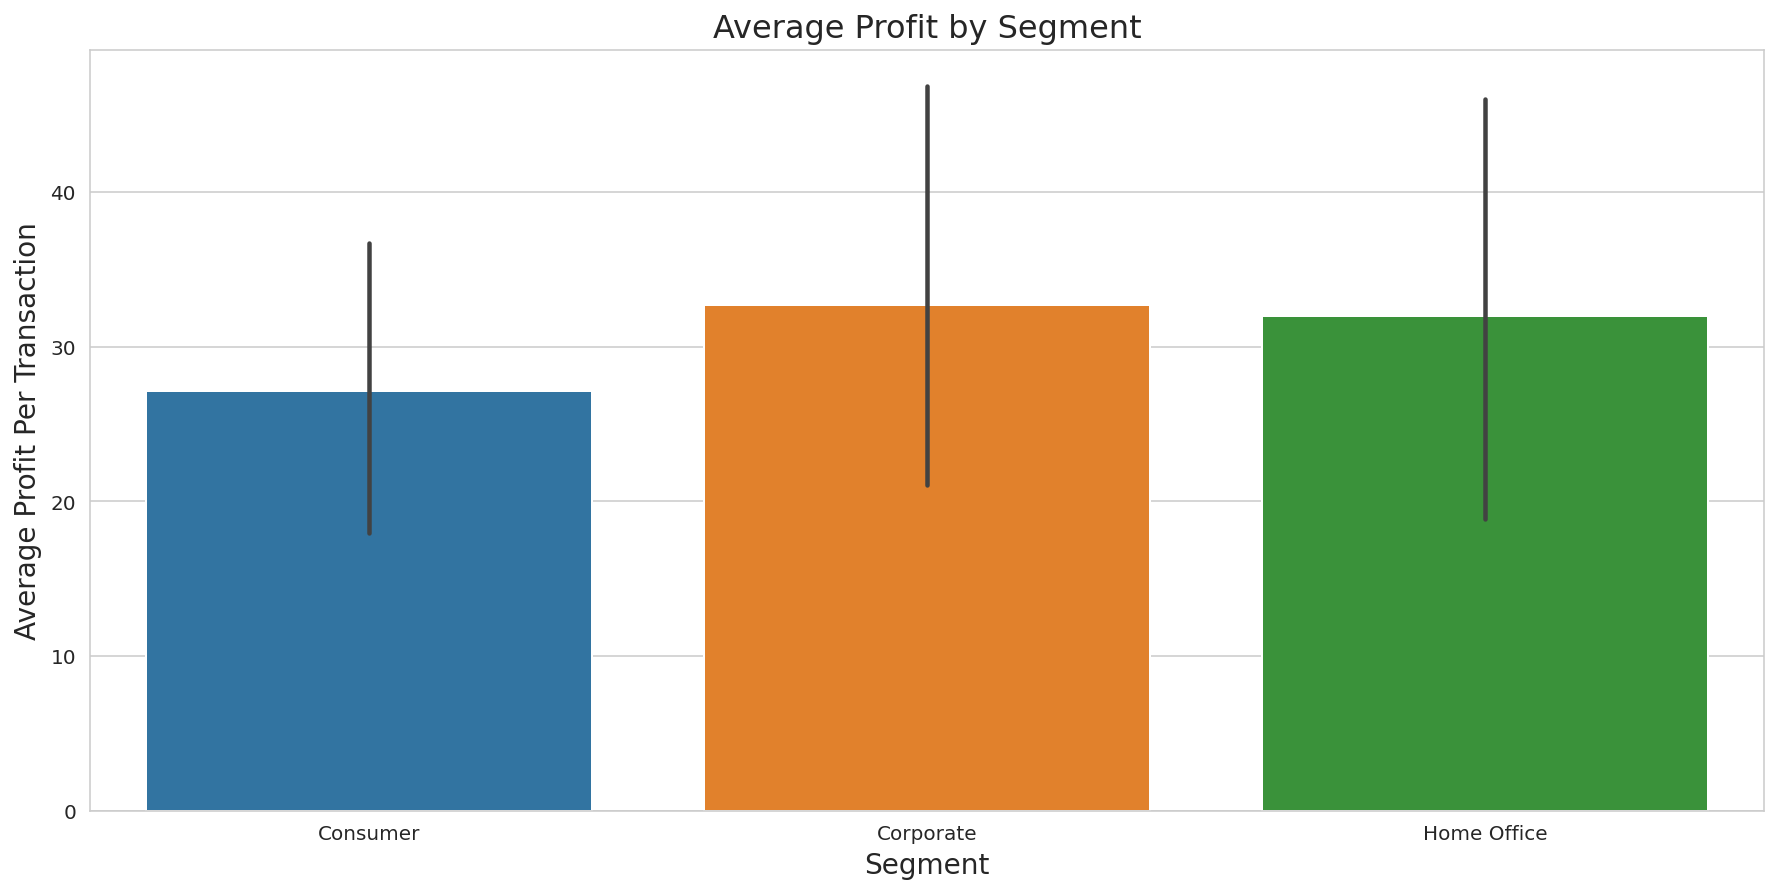

In [77]:
# Check which is the average profit per transaction by Customer Segment

# The Consumer customer segment has the least average profit per transaction

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Profit', estimator=np.mean, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Average Profit Per Transaction', fontsize=14)
ax.set_title(f'Average Profit by Segment', fontsize=16)
plt.show()

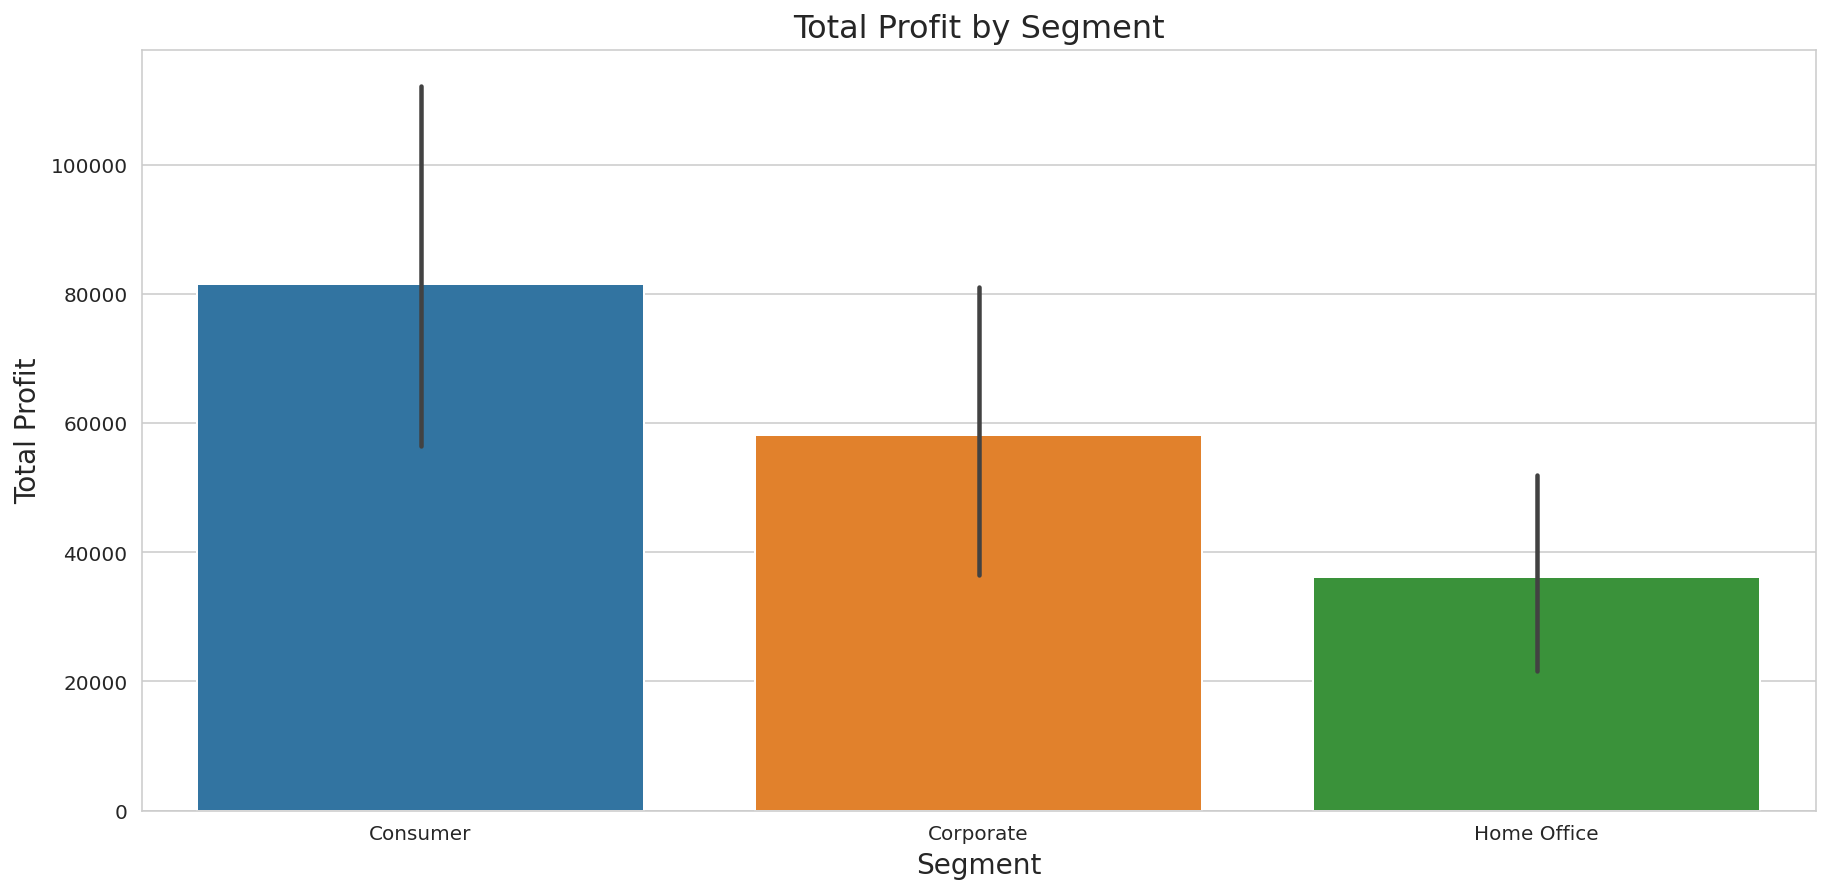

In [78]:
# Check the total profit by Customer Segment

# The Consumer Segment has the highest total Profit 

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Profit', estimator=np.sum, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Segment', fontsize=16)
plt.show()

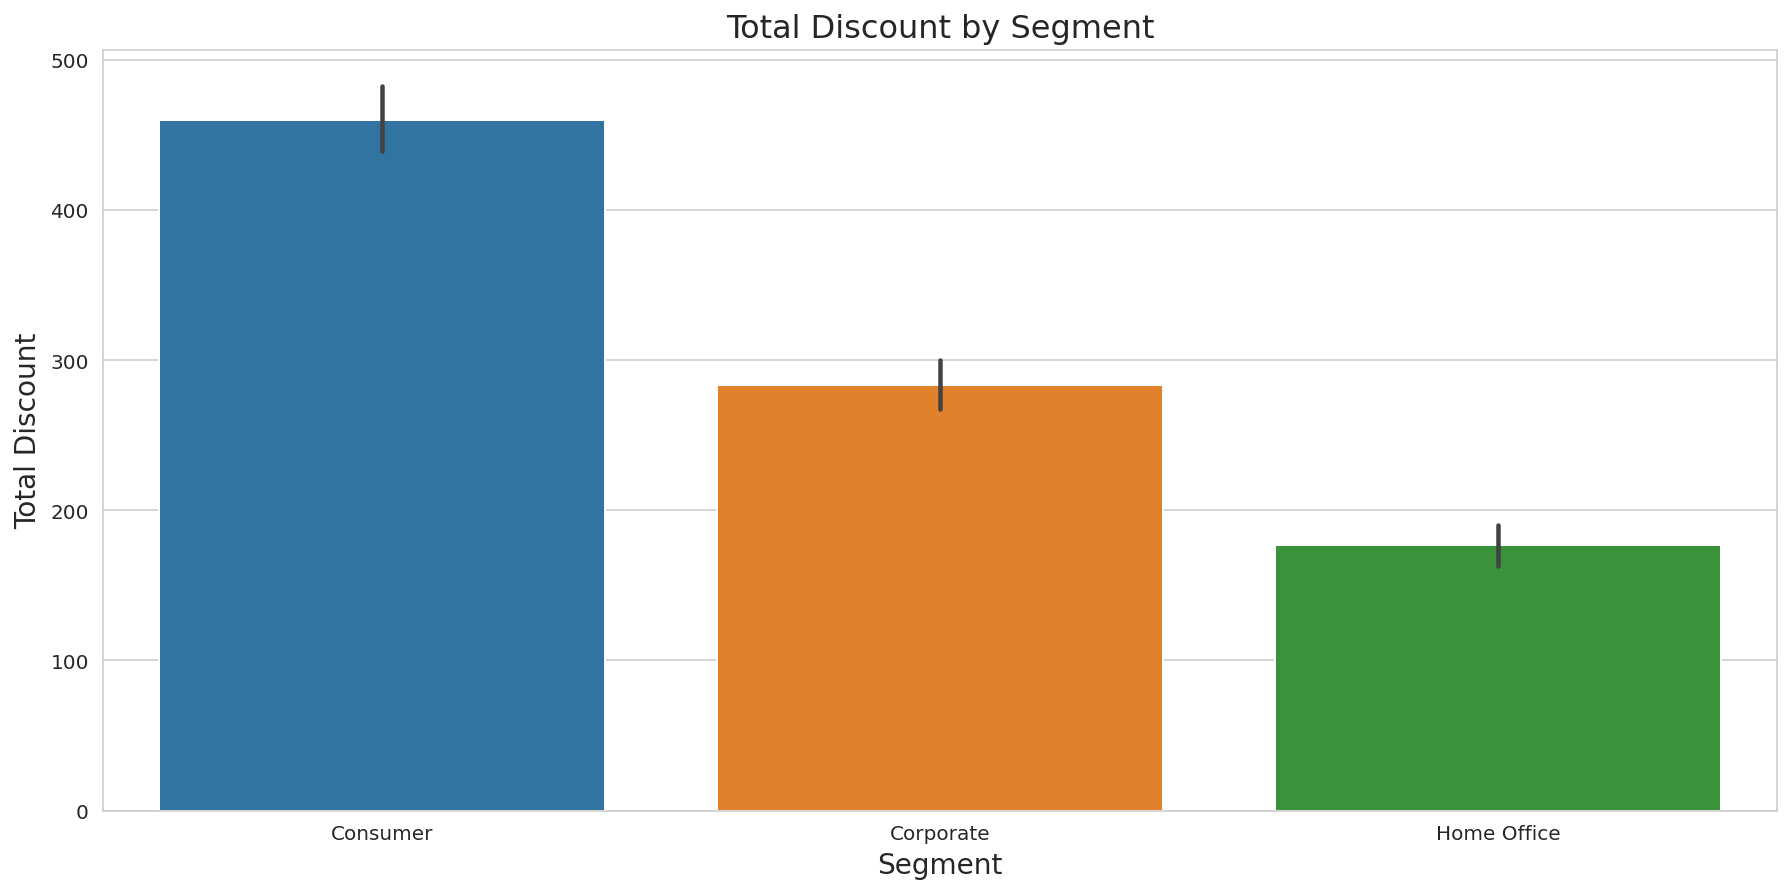

In [79]:
# Check the total amount of discount by customer Segment

# The Consumer Customer Segment has taken the largest amount of discounts and least amount of profit per transaction.
# The Home Office Segment has the least amount of discounts

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Discount', estimator=np.sum, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Discount', fontsize=14)
ax.set_title(f'Total Discount by Segment', fontsize=16)
plt.show()

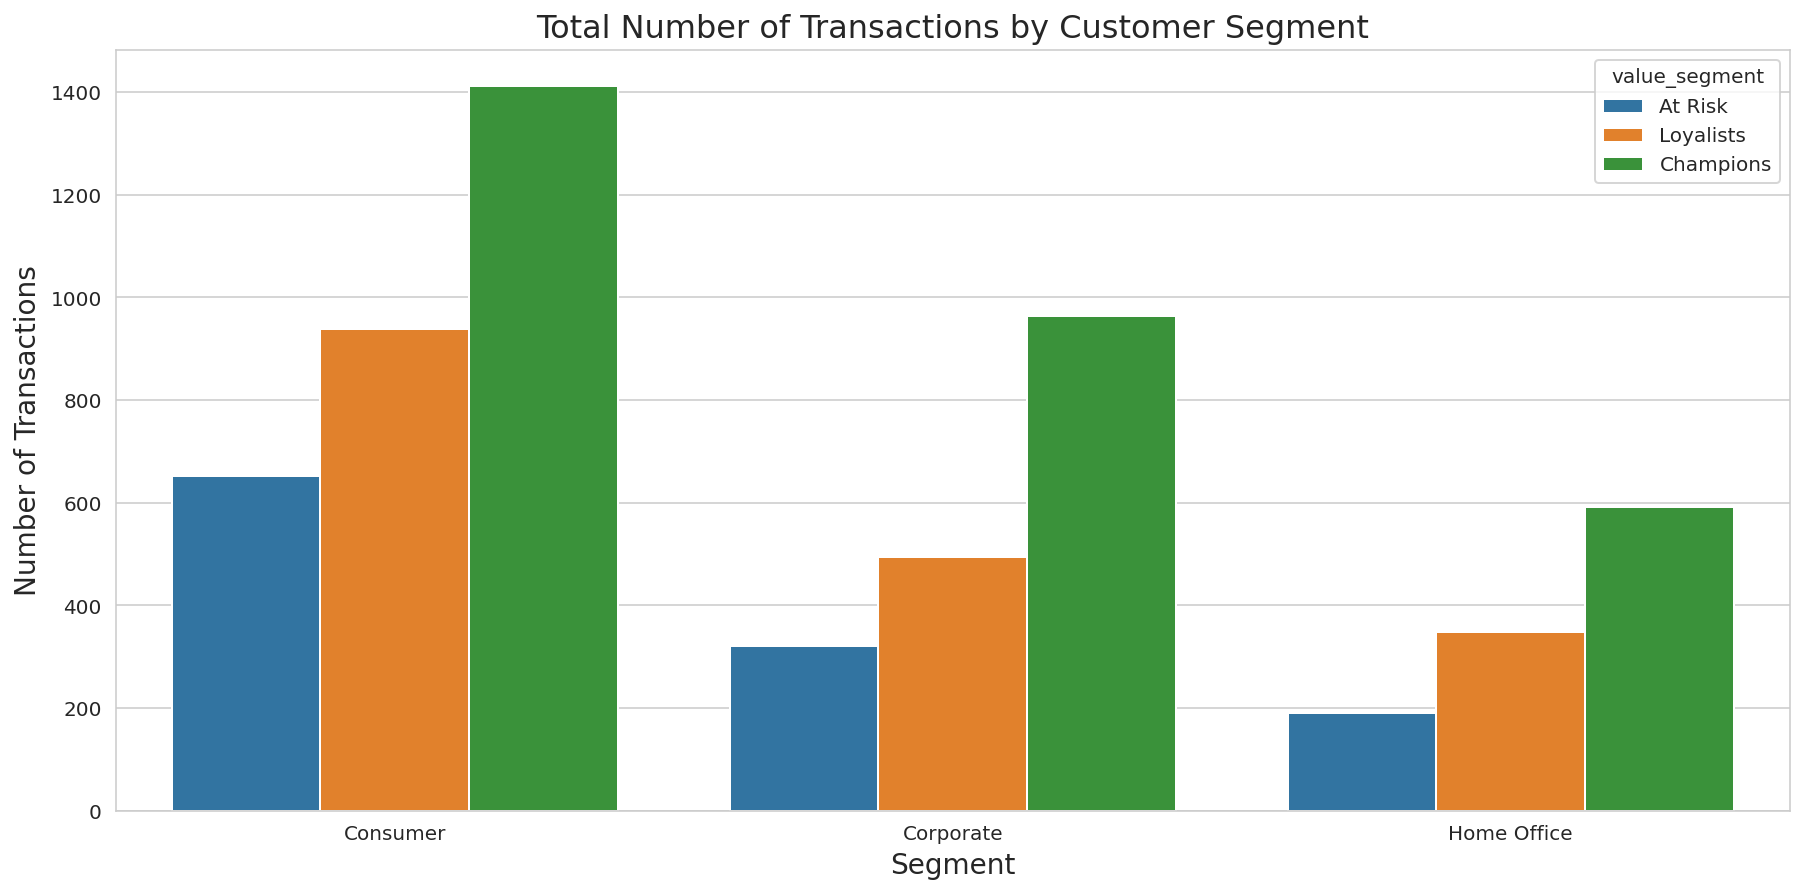

In [80]:
# Check the total number of transactions by Customer Segments by all rfm value_segments

# The Corporate Customer segment has a larger percentage of its customers in the most valuable RFM group (value segment 3)

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Segment', hue='value_segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Customer Segment', fontsize=16)
plt.show()

### **Region Analysis**



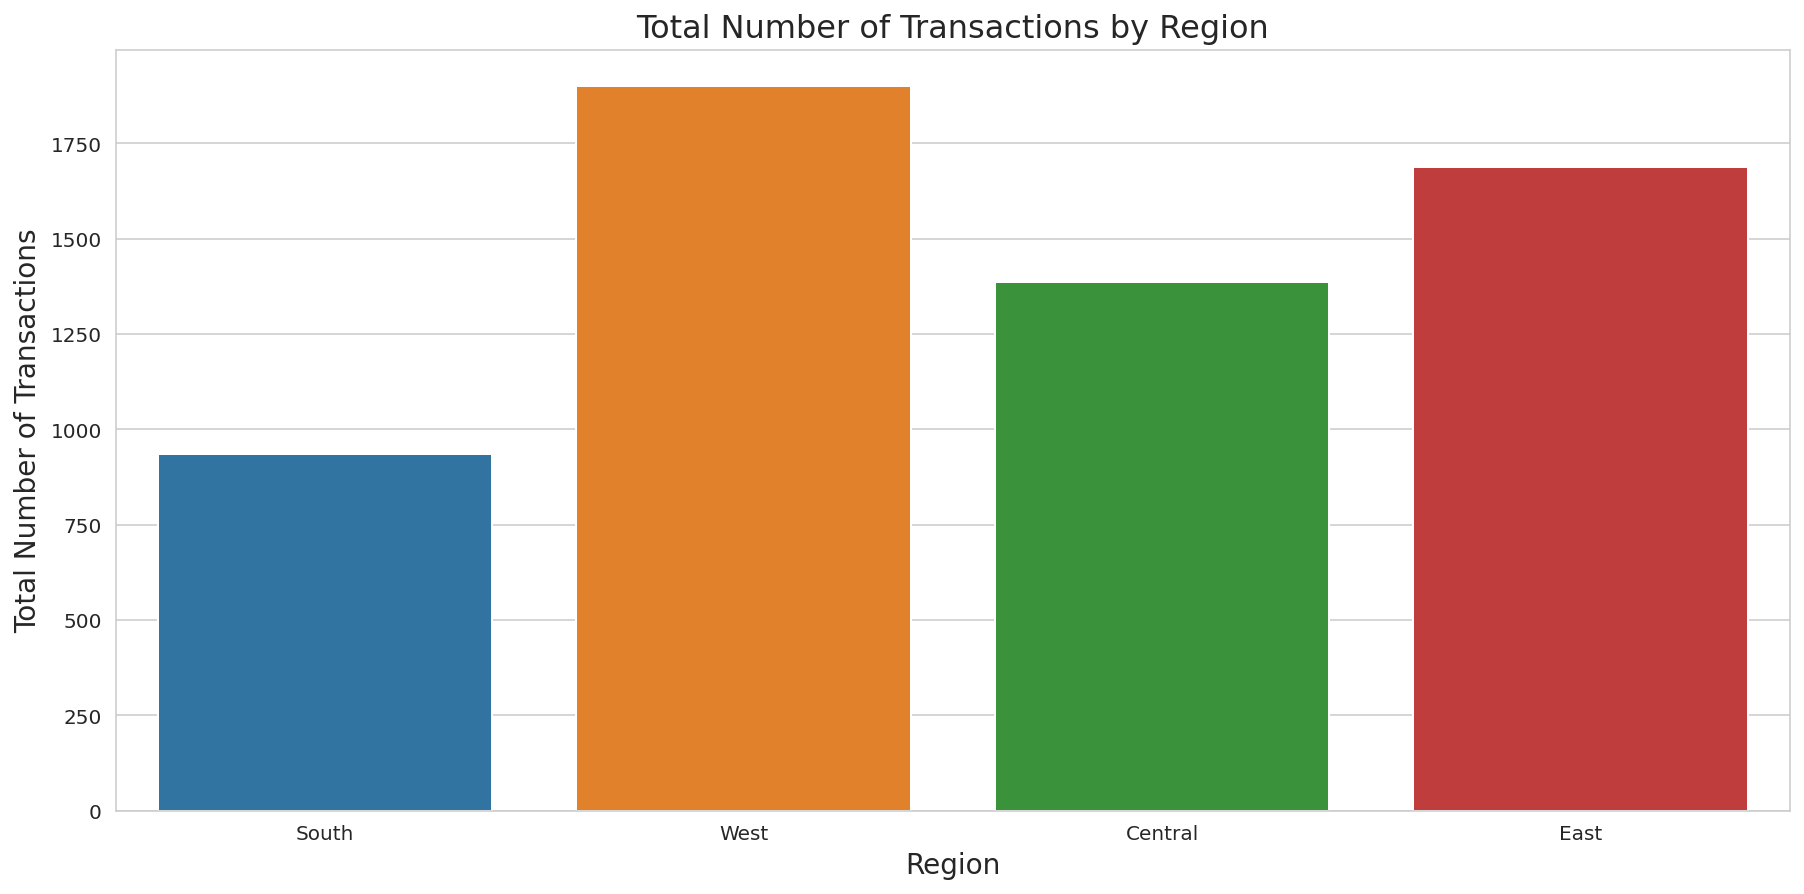

In [81]:
# Check which Region has the most number of transactions

# Customers from the Southern region have the least amount of transactions while the West Region has the highest number of transctions.

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Region', hue='Region')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Region', fontsize=16)
plt.show()

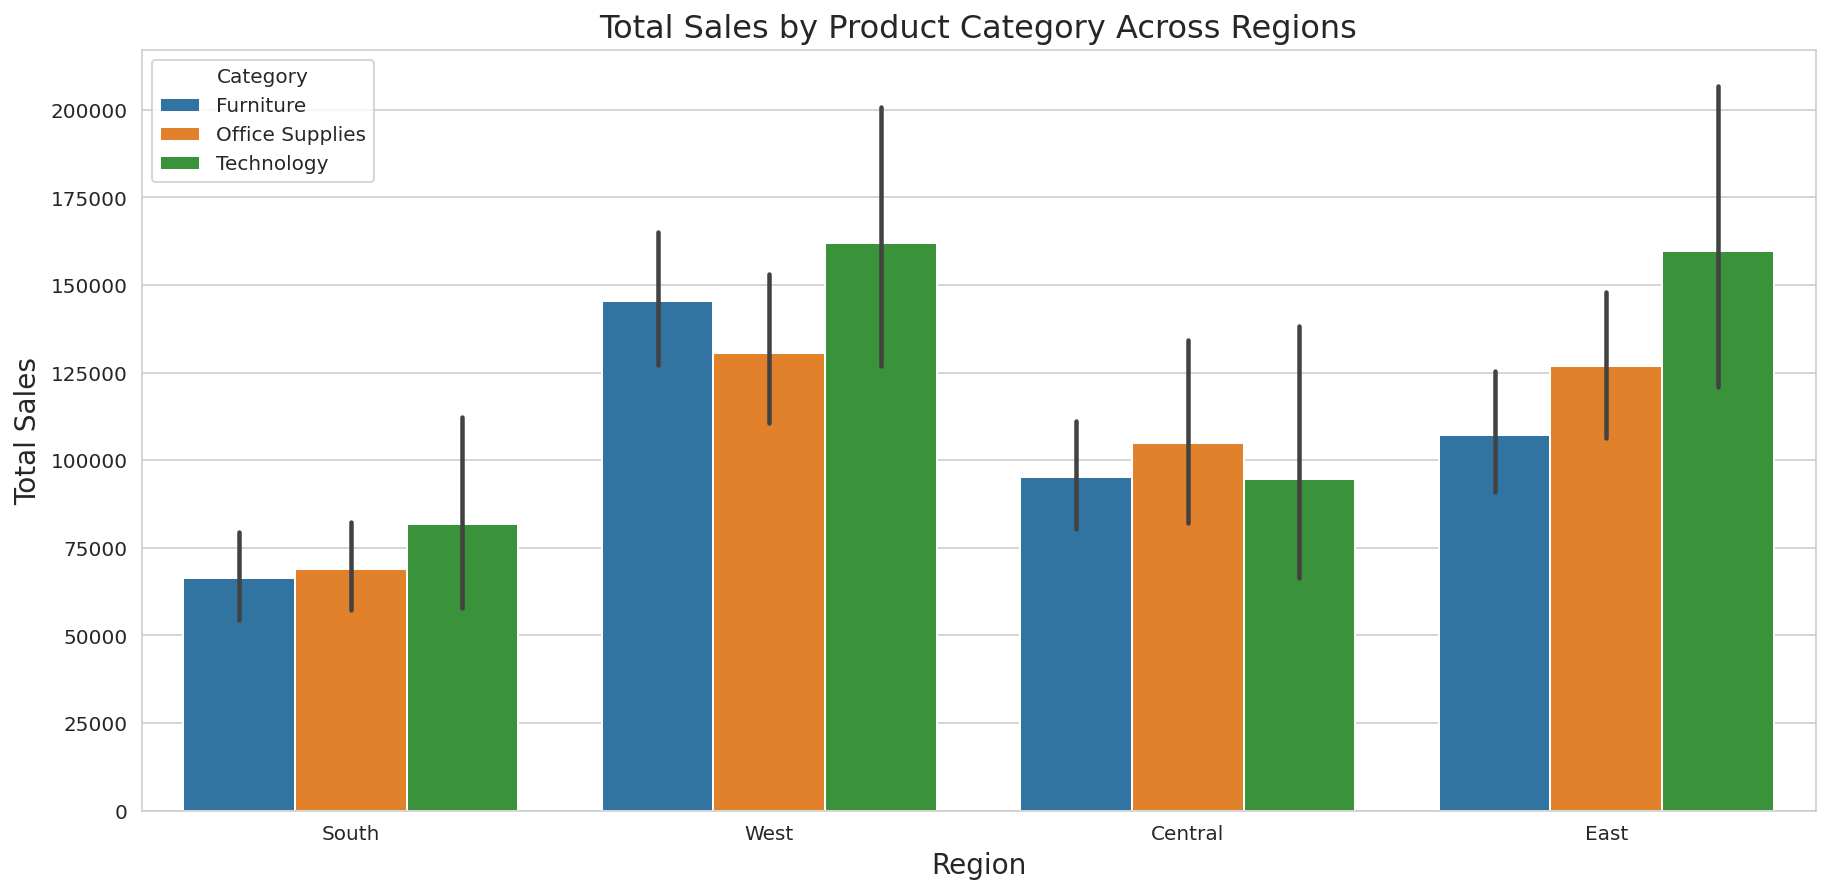

In [82]:
# Additional Insights here!!!

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Region', y='Sales', hue='Category', estimator=np.sum)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel(f'Total Sales', fontsize=14)
ax.set_title(f'Total Sales by Product Category Across Regions', fontsize=16)
plt.show()

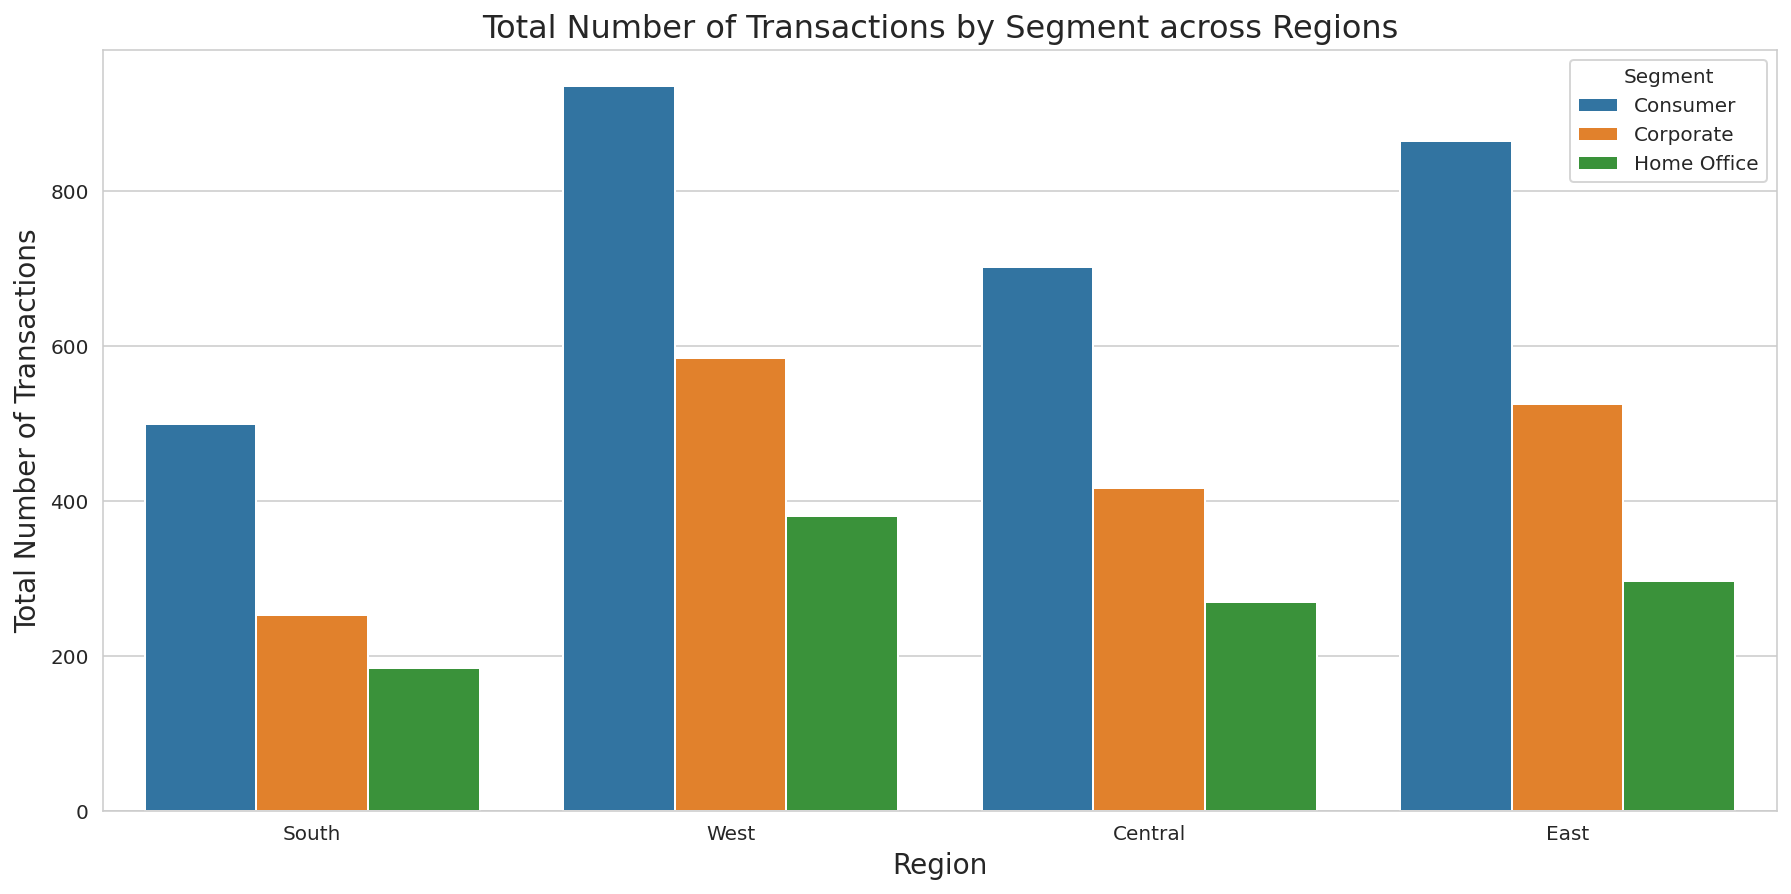

In [83]:
# Check total number of transactions by Region across customer segments

# Total number of transactions by Customer Segment follows the same pattern across all four regions

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Region', hue='Segment')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Segment across Regions', fontsize=16)
plt.show()

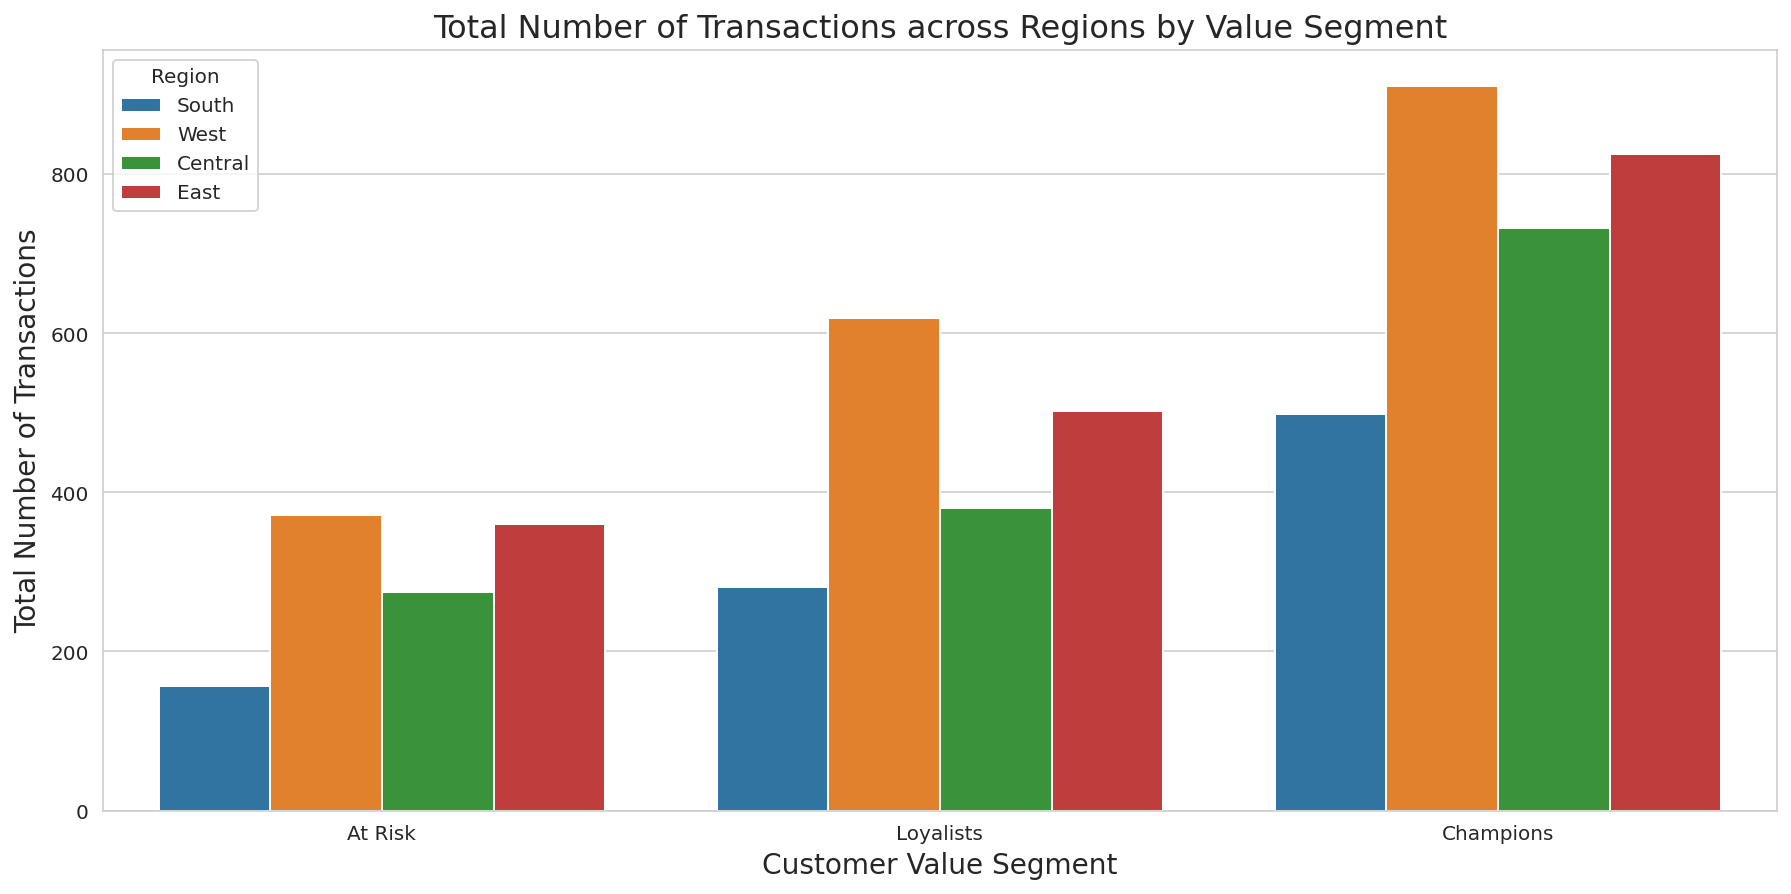

In [84]:
# Check the number of transactions by rfm value segment over all regions

# Generally, customers from the Southern region have the least amount of transactions while the West Region has the highest number of transactions.


fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='value_segment', hue='Region')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions across Regions by Value Segment', fontsize=16)
plt.show()

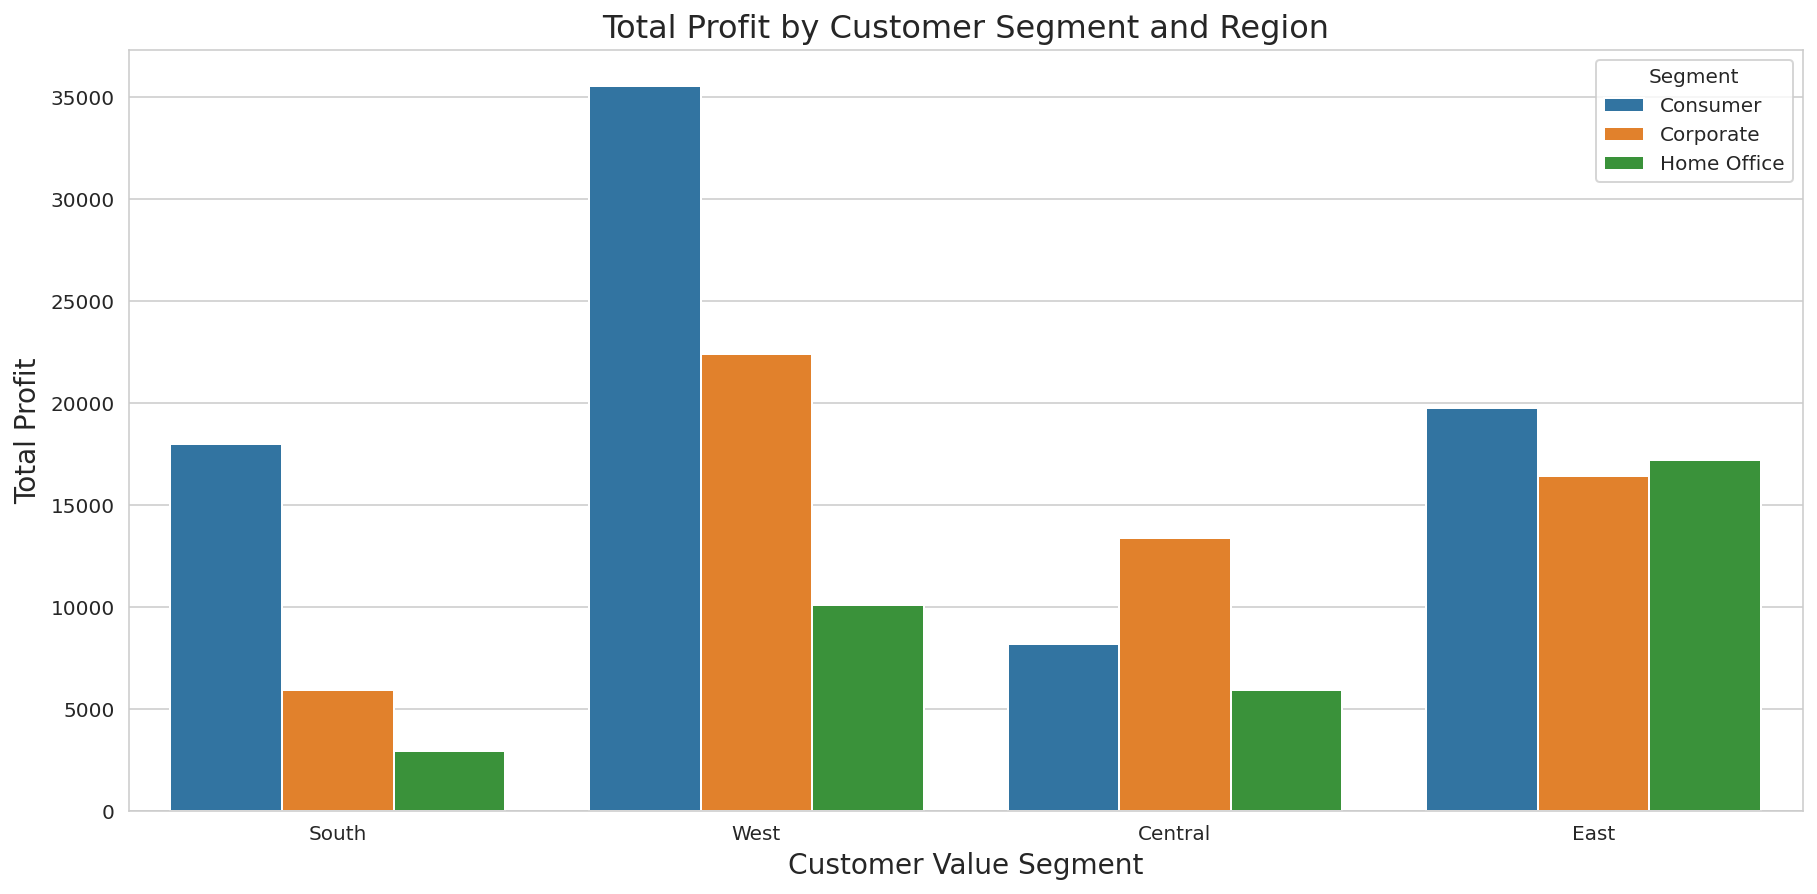

In [85]:
# Check the total profit by region across all customer segments

# The West is the most profitable region.
# The West & South Regions get most profits from the Consumer Segment. 
# The Central Region has most profits from the Corporate Segment
# The East Region appears to be the best region for Home Office customers

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Region', y='Profit', estimator=np.sum, hue='Segment', errorbar=None)
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Customer Segment and Region', fontsize=16)
plt.show()

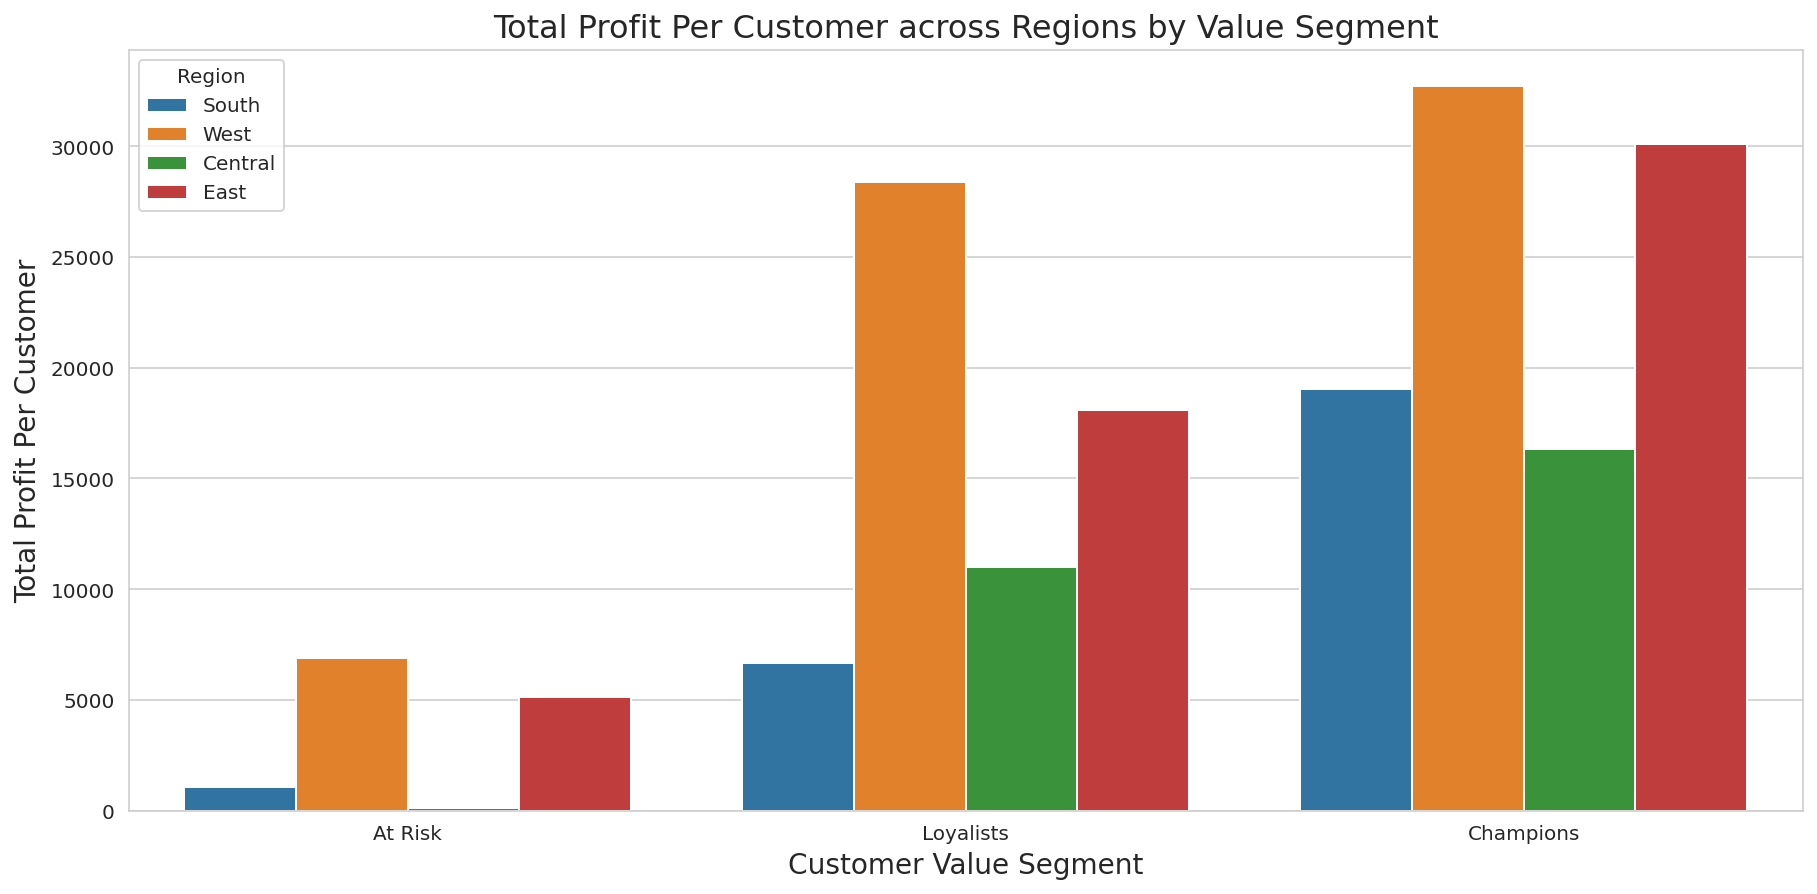

In [86]:
# Check the total profit by rfm value_segment across all regions

# The West & East Regions are the most profitable across all value Segments

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.sum, hue='Region', errorbar=None)
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Profit Per Customer', fontsize=14)
ax.set_title(f'Total Profit Per Customer across Regions by Value Segment', fontsize=16)
plt.show()

## Conclusions & Recommendations



**Customer Value Segment Analysis:**

The Champions Segment are high frequent shoppers who mostly have shopped as recently as in the last 6 months and have a lot of the big spenders. The Loyalists Segment have low\-level to mid\-level purchase frequency and have some big spenders who have not shopped in a while. The At Risk segment are generally low spenders with a mix of low and mid\-level purchase frequency buyers. Many of the At Risk segment customers have not shopped in a very long time.

The highest cash reward offer has been assigned to the most valuable customer segment, the Champions Segment and the lowest cash reward offer assigned to the least valuable customers, the "At Risk" customer segment.



**Product Category Analysis:**

Office Supplies is the most frequently shopped product. While Technology is the least shopped product category, it has the largest amount of sales and largest average cost per item. Technology product category is the most profitable. The furniture category has a significantly higher average cost per item than the Office Supplies category but the least average profit across all three product categories. The furniture product category is the most discounted. 


**Customer Segment Analysis**:

The Consumer segment are the most frequent shoppers and have the highest amount of sales while the Home Office has the least amount of sales and transactions. However, the Corporate segment has the highest average sales per transaction, they are luxury shoppers. The Home Office and Corporate segment customers are more profitable than Consumer segment customers. Consumer segment customers shop mostly on discounted products.



**Region Analysis**:

The West is the most profitable region and has the highest number of transactions while the South is the least active. All regions have highest amount of sales in the Technology products category except in the Central region where Office Supplies has the largest amount of sales. The East appears to be the best region for Home Office customers. The Central region has most profits from the Corporate Segment.



**Ship Mode Analysis**:

The Standard Class is the most frequently used shipping mode while Same Day shipping mode is the least frequently used method. Champions value segment uses Standard Class and Second Class shipping modes the most. The Loyalists value segment has the highest proportion of transactions with negative profits in the Same Day shipping mode. Superstore has lost some profits from transactions fulfilled by loyalists value segment using Same Day shipping mode
